# Pre-model Analysis

### Import libraries

In [9]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style(style = 'whitegrid')
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.base import TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, make_scorer
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.base import TransformerMixin
import category_encoders as ce 
from sklearn.impute import SimpleImputer
from sklearn.linear_model import Lasso

## Overview of dataset

In [10]:
df = pd.read_csv('./bank-additional/bank-additional-full.csv', sep=';')

In [5]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [4]:
df.shape

(41188, 21)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Check duplicates 

In [6]:
df.duplicated().sum()

12

In [7]:
# remove duplicates and reset index
df = df.drop_duplicates()
df = df.reset_index(drop=True)

In [8]:
df.shape

(41176, 21)

### Rename some columns

Some of the column names have periods. Replace columns names that have periods (.) with an underscore (_)

In [9]:
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [10]:
#Replace columns names that have periods (.) with an underscore (_)
old_column_names = df.columns
df.columns = old_column_names.str.replace('.','_')
df.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_idx',
       'cons_conf_idx', 'euribor3m', 'nr_employed', 'y'],
      dtype='object')

### Numeric values

In [11]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41176.00000  41176.000000  41176.000000  41176.000000  41176.000000   
mean      40.02380    258.315815      2.567879    962.464810      0.173013   
std       10.42068    259.305321      2.770318    186.937102      0.494964   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp_var_rate  cons_price_idx  cons_conf_idx     euribor3m   nr_employed  
count  41176.000000    41176.000000   41176.000000  41176.000000  41176.000000  
mean       0.081922       93.575720     -40.502863      3.621293   5167.034870  
std        1.570883        0.578839       4.627860      1.734437     72.251364  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

### Missing values 

In [12]:
df.isnull().sum()

age               0
job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp_var_rate      0
cons_price_idx    0
cons_conf_idx     0
euribor3m         0
nr_employed       0
y                 0
dtype: int64

There’s no missing value in the dataset. However, according to the data documentation, “unknown” value means NA.

# Exploratory Data Analysis & Feature Engineering

## The output variable (desired target y)

y - has the client subscribed a term deposit? (binary: 'yes','no')

In [14]:
# Target Variable (Look at the counts)
df.y.value_counts()

no     36537
yes     4639
Name: y, dtype: int64

In [15]:
# Target Variable (Look at the percentages)
df.y.value_counts(normalize=True)

no     0.887337
yes    0.112663
Name: y, dtype: float64

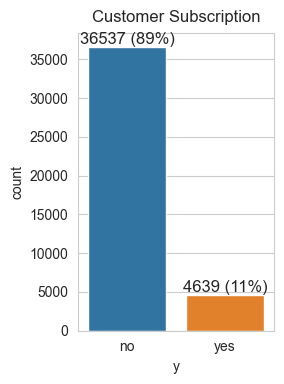

In [16]:
# plot the target variable and check just how imbalance the target variable is

fig, ax = plt.subplots(figsize=(3, 4))
sns.countplot(x=df['y'], ax=ax)
sns.set_theme(style="whitegrid")

abs_vals = df['y'].value_counts()
rel_vals = df['y'].value_counts(normalize=True) * 100
labels = [f'{p[0]} ({p[1]:.0f}%)' for p in zip(abs_vals, rel_vals)]

ax.bar_label(container=ax.containers[0], labels=labels)
ax.set_title('Customer Subscription', fontsize=12, pad=8)

plt.tight_layout();

<AxesSubplot: ylabel='y'>

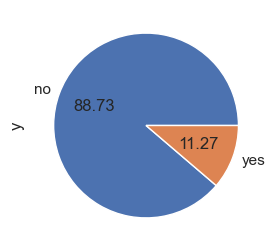

In [17]:
df['y'].value_counts().plot.pie(autopct='%.2f', figsize=(3,3))

The dataset is imbalanced.There are more no's then yes's in this dataset, which is probably what is expected in the bank marketing subscriber environment. This is also the case of an imbalanced dataset and care must be taken into consideration when looking at accruacy, precision and recall.

### Bank customer attributes

Numeric (1): age

Categorical (6): job, marital (marital status), education, default (has credit in default), housing (has housing loan), loan (has personal loan)

#### age    
What kind of persons were contacted during this marketing campaign?

In [18]:
df.age.value_counts()

31    1947
32    1845
33    1833
36    1779
35    1758
      ... 
89       2
91       2
94       1
87       1
95       1
Name: age, Length: 78, dtype: int64

In [19]:
df.age.value_counts(normalize=True).sort_index()

17    0.000121
18    0.000680
19    0.001020
20    0.001579
21    0.002477
        ...   
91    0.000049
92    0.000097
94    0.000024
95    0.000024
98    0.000049
Name: age, Length: 78, dtype: float64

In [20]:
df.age.value_counts(normalize=True).sort_index()

17    0.000121
18    0.000680
19    0.001020
20    0.001579
21    0.002477
        ...   
91    0.000049
92    0.000097
94    0.000024
95    0.000024
98    0.000049
Name: age, Length: 78, dtype: float64

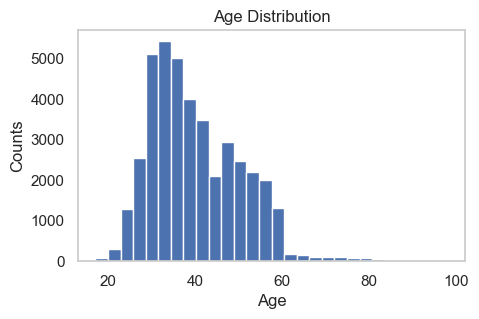

In [21]:
df.age.plot(kind='hist',bins = 28, figsize=(5, 3))
plt.xlabel('Age')
plt.ylabel('Counts')
plt.title('Age Distribution')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Age Distribution')

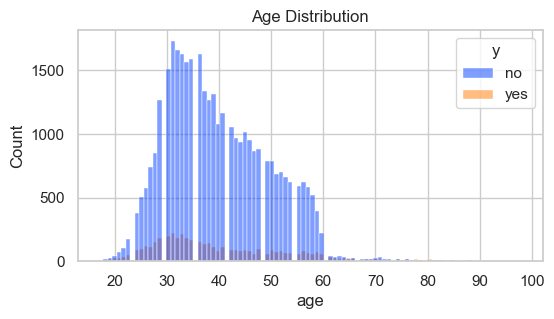

In [22]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(x='age',hue= 'y', data=df, palette = 'bright')
plt.title('Age Distribution')

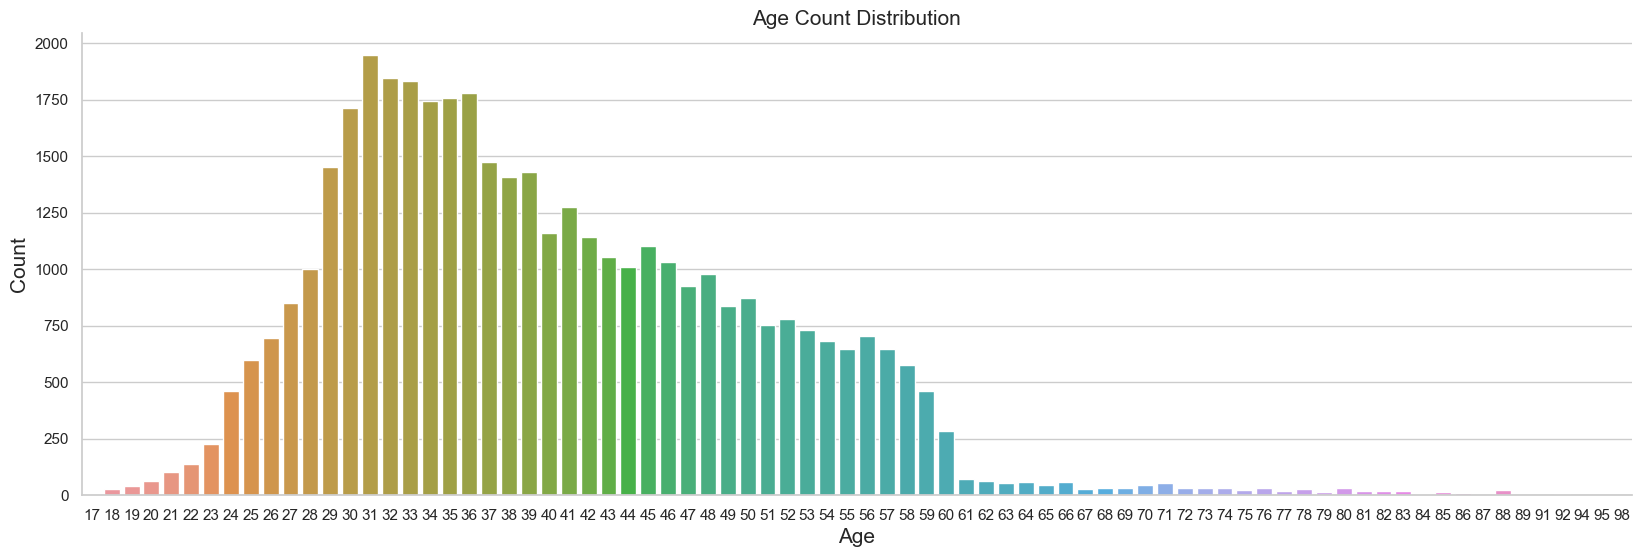

In [23]:
fig, ax = plt.subplots()
fig.set_size_inches(20, 6)
sns.countplot(x = 'age', data = df)
ax.set_xlabel('Age', fontsize=15)
ax.set_ylabel('Count', fontsize=15)
ax.set_title('Age Count Distribution', fontsize=15)
sns.despine()

<AxesSubplot: title={'center': 'Subscription% vs Age'}, xlabel='Age', ylabel='Subscription%'>

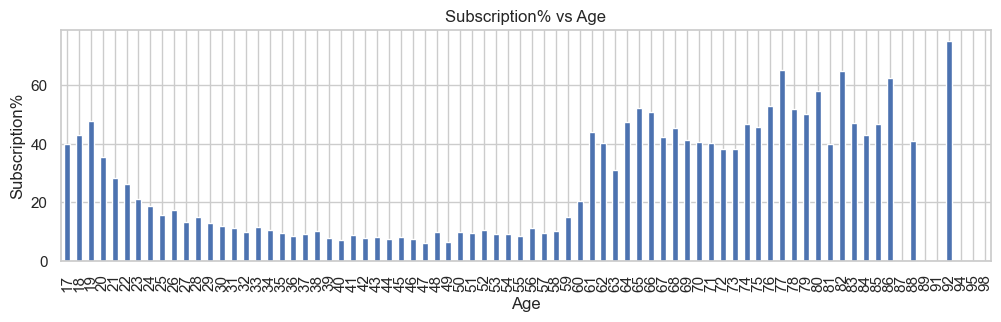

In [24]:
filter1=(df['y']=='yes')
age1=df.loc[filter1, ['age','y']].age.value_counts()

filter0=(df['y']=='no')
age0=df.loc[filter0, ['age','y']].age.value_counts()

yes_perc=age1/(age0+age1)*100
yes_perc.plot(kind='bar', xlabel='Age', ylabel='Subscription%', title='Subscription% vs Age',figsize=(12,3))

Text(0.5, 1.0, 'Boxplot of Age')

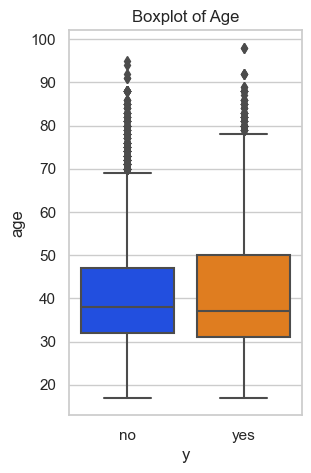

In [25]:
fig, ax = plt.subplots(figsize=(3,5))
sns.boxplot(x='y', y = 'age', data=df, palette = 'bright')
ax.set_title('Boxplot of Age')

In [26]:
# Quartiles
print('1º Quartile: ', df['age'].quantile(q = 0.25))
print('2º Quartile: ', df['age'].quantile(q = 0.50))
print('3º Quartile: ', df['age'].quantile(q = 0.75))
print('4º Quartile: ', df['age'].quantile(q = 1.00))
#Calculate the outliers:
  # Interquartile range, IQR = Q3 - Q1
  # lower 1.5*IQR whisker = Q1 - 1.5 * IQR 
  # Upper 1.5*IQR whisker = Q3 + 1.5 * IQR
print('Ages above: ', df['age'].quantile(q = 0.75) + 
                      1.5*(df['age'].quantile(q = 0.75) - df['age'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  32.0
2º Quartile:  38.0
3º Quartile:  47.0
4º Quartile:  98.0
Ages above:  69.5 are outliers


In [27]:
print('Numerber of outliers: ', df[df['age'] > 69.6]['age'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['age'] > 69.6]['age'].count()*100/len(df),2), '%')

Numerber of outliers:  468
Number of clients:  41176
Outliers are: 1.14 %


##### Age Summary: 
Ages range from 17 to 98, there doesn’t seem anything strange from there. The other summary statistics are fine, the average is 40 years old.     
age:17-21 has higher subscription: 20-40%. but the number of group is very few.  
age:22-60: subsciption rate: 10%,   
age:>60: subscription rate:40% (corresponding to job categories)    
There are some outliers, but we think it's normal because the age of one generation is supposed to be between 0-100. As a result, we'll keep all the data in 'age' column and label this numerical data into 3 catagorical groups.

suggestion: we'd better to label this category and do OneHotEncoder/Dummy transformation.

In [28]:
# Converting age into categorical variable.

df['age_bin'] = pd.cut(df['age'], [0, 21, 60, 100], 
                       labels=['0-21', '22-60', '61-100'])
#df = df.drop('age', axis = 1)

In [29]:
df['age_bin']

0         22-60
1         22-60
2         22-60
3         22-60
4         22-60
          ...  
41171    61-100
41172     22-60
41173     22-60
41174     22-60
41175    61-100
Name: age_bin, Length: 41176, dtype: category
Categories (3, object): ['0-21' < '22-60' < '61-100']

<AxesSubplot: title={'center': 'Subscription% vs Age_bin'}, xlabel='Age_bin', ylabel='Subscription%'>

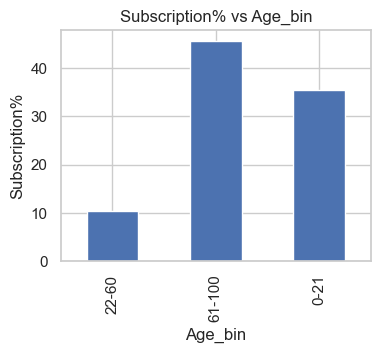

In [30]:
filter1=(df['y']=='yes')
age_bin1=df.loc[filter1, ['age_bin','y']].age_bin.value_counts()

filter0=(df['y']=='no')
age_bin0=df.loc[filter0, ['age_bin','y']].age_bin.value_counts()

yes_perc=age_bin1/(age_bin0+age_bin1)*100
yes_perc.plot(kind='bar', xlabel='Age_bin', ylabel='Subscription%', title='Subscription% vs Age_bin',figsize=(4,3))

#### job    
What kind of jobs are represented by our clients pool?

In [31]:
#Look at the counts
df.job.value_counts()

admin.           10419
blue-collar       9253
technician        6739
services          3967
management        2924
retired           1718
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64

In [32]:
# Look at the percentages
df.job.value_counts(normalize=True)

admin.           0.253036
blue-collar      0.224718
technician       0.163663
services         0.096343
management       0.071012
retired          0.041723
entrepreneur     0.035360
self-employed    0.034510
housemaid        0.025743
unemployed       0.024626
student          0.021250
unknown          0.008014
Name: job, dtype: float64

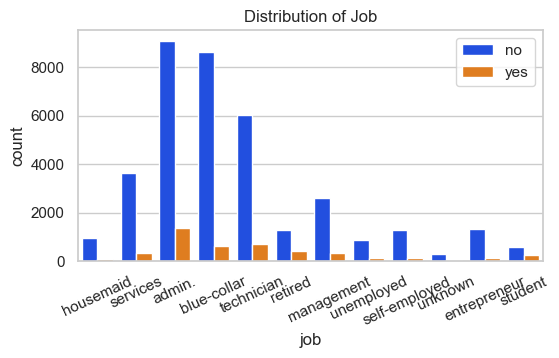

In [33]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.countplot(x='job',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of Job')
plt.xticks(rotation = 25)
plt.legend(loc='upper right')

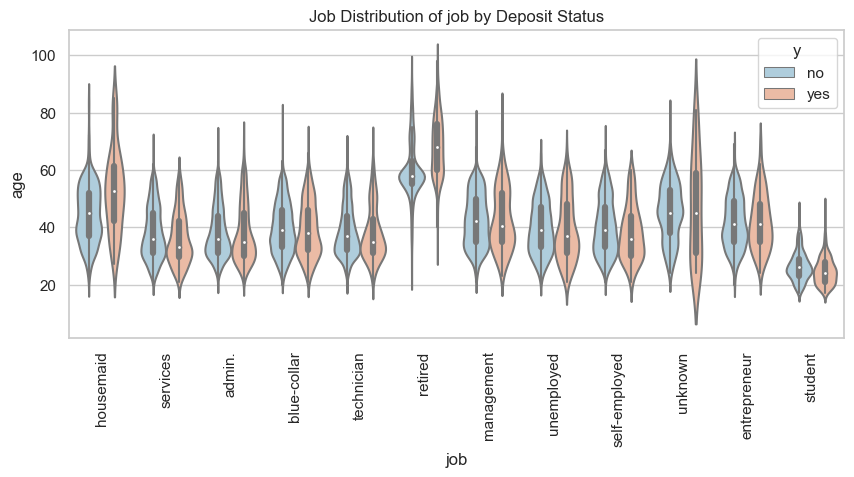

In [34]:
fig = plt.figure(figsize=(10,4))

sns.violinplot(x="job", y='age', hue="y", palette="RdBu_r", data=df);
plt.xticks(rotation = 90)
plt.title("Job Distribution of job by Deposit Status", fontsize=12)

plt.show()

<AxesSubplot: title={'center': 'Subscription% vs Job'}, xlabel='Job', ylabel='Subscription%'>

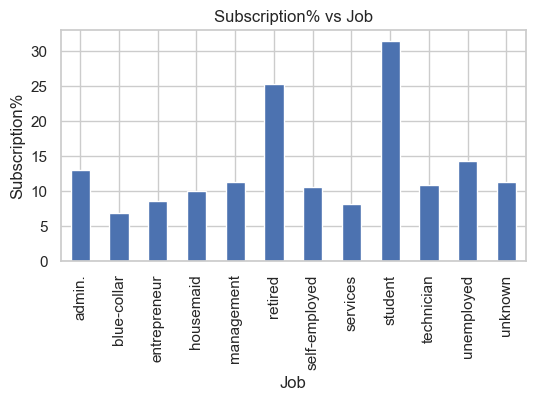

In [35]:
filter1=(df['y']=='yes')
job1=df.loc[filter1, ['job','y']].job.value_counts()

filter0=(df['y']=='no')
job0=df.loc[filter0, ['job','y']].job.value_counts()

yes_perc=job1/(job0+job1)*100
yes_perc.plot(kind='bar', xlabel='Job', ylabel='Subscription%', title='Subscription% vs Job',figsize=(6,3))

In [36]:
yes_perc

admin.           12.966695
blue-collar       6.895061
entrepreneur      8.516484
housemaid        10.000000
management       11.217510
retired          25.261932
self-employed    10.485574
services          8.142173
student          31.428571
technician       10.832468
unemployed       14.201183
unknown          11.212121
Name: job, dtype: float64

In [37]:
df['job'].replace("unknown", np.nan, inplace=True)
df.dropna(subset=['job'],inplace=True)

##### Job Summary: 
Surprisingly, students (31.4%), retired people (25.2%) and unemployed (14.2%) categories show the best relative frequencies of term deposit subscription. Other classes range between 6.9% (blue-collar) and 13.0% (admin.).       
The “unknown” level(0.8%) doesn’t show any important information and should be discarded from the data. We’ll remove rows containing this value in the “job” column.   
suggestion: we'll drop “unknown” level  and do OneHotEncoder/Dummy transformation.

In [38]:
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Now let's see which occupation tended to have more balance in their accounts

suscribed_df = df.loc[df["y"] == "yes"]

#occupations = df["job"].unique().tolist()
occupations = ['admin', 'management', 'technician', 'services', 'retired', 'blue_collar', 'unemployed', 
         'entrepreneur', 'housemaid', 'self_employed', 'student']

# Get the balances by jobs
admin = suscribed_df["age"].loc[suscribed_df["job"] == "admin."].values
management = suscribed_df["age"].loc[suscribed_df["job"] == "management"].values
technician = suscribed_df["age"].loc[suscribed_df["job"] == "technician"].values
services = suscribed_df["age"].loc[suscribed_df["job"] == "services"].values
retired = suscribed_df["age"].loc[suscribed_df["job"] == "retired"].values
blue_collar = suscribed_df["age"].loc[suscribed_df["job"] == "blue-collar"].values
unemployed = suscribed_df["age"].loc[suscribed_df["job"] == "unemployed"].values
entrepreneur = suscribed_df["age"].loc[suscribed_df["job"] == "entrepreneur"].values
housemaid = suscribed_df["age"].loc[suscribed_df["job"] == "housemaid"].values
self_employed = suscribed_df["age"].loc[suscribed_df["job"] == "self-employed"].values
student = suscribed_df["age"].loc[suscribed_df["job"] == "student"].values

ages = [admin, management, technician, services, retired, blue_collar, unemployed, 
         entrepreneur, housemaid, self_employed, student]

colors = ['rgba(229, 96, 56, 0.5)','rgba(93, 164, 214, 0.5)', 'rgba(255, 144, 14, 0.5)',
          'rgba(44, 160, 101, 0.5)', 'rgba(255, 65, 54, 0.5)', 
          'rgba(207, 114, 255, 0.5)', 'rgba(127, 96, 0, 0.5)',
         'rgba(229, 126, 56, 0.5)', 'rgba(229, 56, 56, 0.5)',
         'rgba(174, 229, 56, 0.5)', 'rgba(229, 56, 56, 0.5)']

traces = []
for xd, yd, cls in zip(occupations, ages, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),))
        
layout = go.Layout(
    title='Distribution of Ages by Occupation',
    yaxis=dict(
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,),
    paper_bgcolor='rgb(224,255,246)',
    plot_bgcolor='rgb(251,251,251)',
    showlegend=False)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

#### marital (marital status)

In [39]:
#Look at the counts
df.marital.value_counts()

married     24687
single      11490
divorced     4598
unknown        71
Name: marital, dtype: int64

In [40]:
# Look at the percentages
df.marital.value_counts(normalize=True)

married     0.604392
single      0.281300
divorced    0.112569
unknown     0.001738
Name: marital, dtype: float64

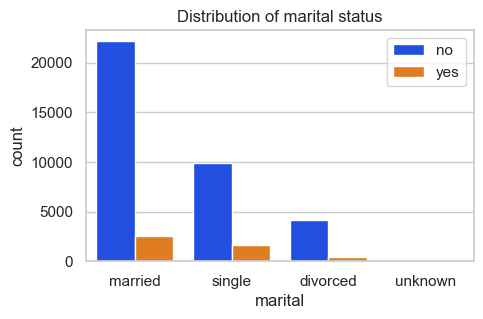

In [41]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x='marital',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of marital status')
#plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Marital'}, xlabel='Marital', ylabel='Subscription%'>

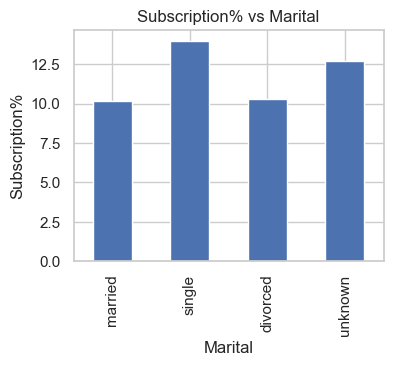

In [42]:
filter1=(df['y']=='yes')
marital1=df.loc[filter1, ['marital','y']].marital.value_counts()

filter0=(df['y']=='no')
marital0=df.loc[filter0, ['marital','y']].marital.value_counts()

yes_perc=marital1/(marital0+marital1)*100
yes_perc.plot(kind='bar', xlabel='Marital', ylabel='Subscription%', title='Subscription% vs Marital',figsize=(4,3))

In [43]:
yes_perc

married     10.187548
single      13.968668
divorced    10.287081
unknown     12.676056
Name: marital, dtype: float64

##### marital Summary: 
Single (14.0%) categories show the best relative frequencies of term deposit subscription.    
The “unknown” level shows 12.67% of subscription rate which is close to'single' group. We’ll add it to the "single" group. It seems an ascending trend among "married', 'divorced' and 'single'. So, we'll use ordinal transfrom.

suggestion: we'll add “unknown” level to the "single" group and do ordinal transform.

#### education

In [44]:
#Look at the counts
df.education.value_counts()

university.degree      12119
high.school             9475
basic.9y                6014
professional.course     5228
basic.4y                4124
basic.6y                2269
unknown                 1599
illiterate                18
Name: education, dtype: int64

In [45]:
# Look at the percentages
df.education.value_counts(normalize=True).sort_index()

basic.4y               0.100965
basic.6y               0.055550
basic.9y               0.147236
high.school            0.231969
illiterate             0.000441
professional.course    0.127993
university.degree      0.296700
unknown                0.039147
Name: education, dtype: float64

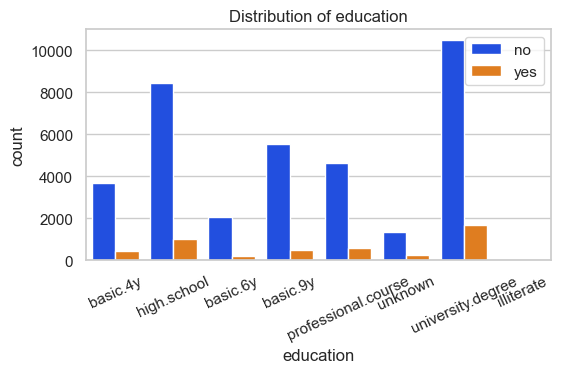

In [46]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.countplot(x='education',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of education')
plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Education'}, xlabel='Education', ylabel='Subscription%'>

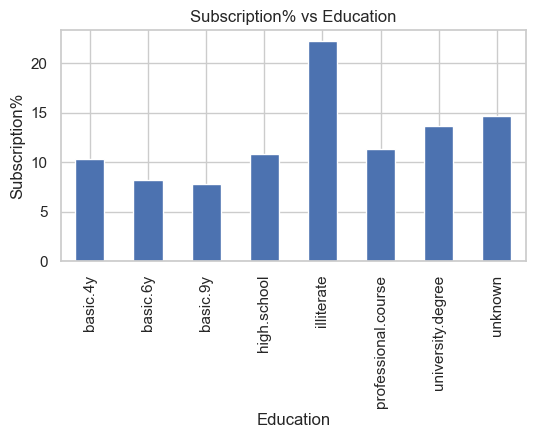

In [47]:
filter1=(df['y']=='yes')
education1=df.loc[filter1, ['education','y']].education.value_counts()

filter0=(df['y']=='no')
education0=df.loc[filter0, ['education','y']].education.value_counts()

yes_perc=education1/(education0+education1)*100
yes_perc.plot(kind='bar', xlabel='Education', ylabel='Subscription%', title='Subscription% vs Education',figsize=(6,3))

In [48]:
yes_perc

basic.4y               10.281280
basic.6y                8.241516
basic.9y                7.848354
high.school            10.860158
illiterate             22.222222
professional.course    11.361897
university.degree      13.680997
unknown                14.634146
Name: education, dtype: float64

Among the 1,595 rows containing the “unknown” value,14.7% of them subscribed to a term deposit. This is around 5% of the total group of subscribers. Since we’re facing a very unbalanced dependent variable situation, we can not afford to discard those rows. Because this category has the highest relative frequency of “y = 1” (14.7%), we’re going to add them in the “university.degree” level. It has the second highest “y = 1” relative frequency (13.7%). Also, we'll drop 'illiterate'which only contains 18 customers but substription rate is 22% that looks like outliers.

In [49]:
df['education'].replace("illiterate", np.nan, inplace=True)
df.dropna(subset=['education'],inplace=True)

In [50]:
df['education'].value_counts()

university.degree      12119
high.school             9475
basic.9y                6014
professional.course     5228
basic.4y                4124
basic.6y                2269
unknown                 1599
Name: education, dtype: int64

In [51]:
class edu_Transformer(object):

    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['education'] = X['education'].replace("unknown", "university.degree", inplace=True)
        self.ord = {"basic.4y":0,"basic.6y":0,"basic.9y":0, "high.school":1,
                    "professional.course":2,"university.degree":3
                    }

    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['education'] = X['education'].replace("unknown", "university.degree", inplace=True)
        return pd.DataFrame(X['education'].map(self.ord))

    def fit_transform(self, X, y=None):     
        self.fit(X)
        return self.transform(X)

##### education Summary: 
Although 'illiterate' level shows the highest subscription rate (22.2%), however, there're only 18 people in this group which might not be enough from a statistical point of view. It appears that a positive correlation between the number of years of education and the odds to subscribe to a term deposit exists.

suggestion: we'll add the “unknown” level to “university.degree” level, drop 'illiterate' group and do OrdinalEncoder/dummy transform, or group it into 3 suubgroups and do dummy transfrom.

In [52]:
df['education_bin'] = df['education'].replace(["basic.4y","basic.6y","basic.9y"], 'basic')
#df['education_bin'] = df['education_bin'].replace(["high.school","professional.course"], 'high_prof')

In [53]:
df['education_bin'].value_counts()

basic                  12407
university.degree      12119
high.school             9475
professional.course     5228
unknown                 1599
Name: education_bin, dtype: int64

#### default (has credit in default)    
Does the client have a credit in default?

In [54]:
#Look at the counts
df.default.value_counts()

no         32388
unknown     8437
yes            3
Name: default, dtype: int64

In [55]:
# Look at the percentages
df.default.value_counts(normalize=True)

no         0.793279
unknown    0.206647
yes        0.000073
Name: default, dtype: float64

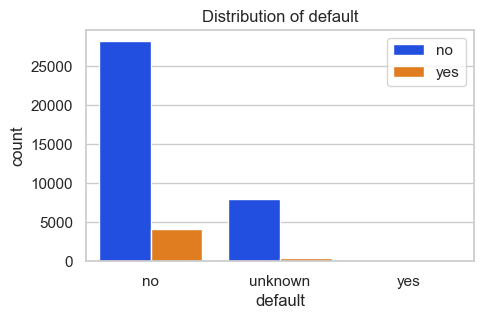

In [56]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x='default',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of default')
#plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Default'}, xlabel='Default', ylabel='Subscription%'>

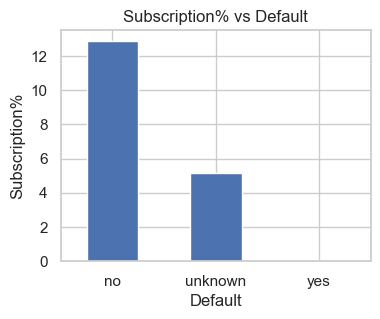

In [57]:
filter1=(df['y']=='yes')
default1=df.loc[filter1, ['default','y']].default.value_counts()

filter0=(df['y']=='no')
default0=df.loc[filter0, ['default','y']].default.value_counts()

yes_perc=default1/(default0+default1)*100
yes_perc.plot(kind='bar', xlabel='Default', ylabel='Subscription%', title='Subscription% vs Default',figsize=(4,3), rot=0)

In [58]:
yes_perc

no         12.853526
unknown     5.155861
yes              NaN
Name: default, dtype: float64

##### default Summary: 
This feature is certainly not usable. Only 3 individuals replied “yes” to the question “Do you have credit in default?”. People either answered “no” (79.3%) or don’t even reply (20.7%), which gives zero information in our case. This variable is removed from the dataset.

suggestion: we'll drop this variable.

#### housing (has housing loan)
Does the client have a housing loan?

In [59]:
#Look at the counts
df.housing.value_counts()

yes        21389
no         18454
unknown      985
Name: housing, dtype: int64

In [60]:
# Look at the percentages
df.housing.value_counts(normalize=True)

yes        0.523881
no         0.451994
unknown    0.024126
Name: housing, dtype: float64

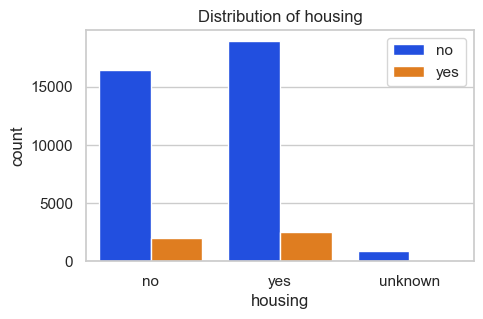

In [61]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x='housing',hue= 'y', data=df, palette ='bright')
ax.set_title('Distribution of housing')
#plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Housing'}, xlabel='Housing', ylabel='Subscription%'>

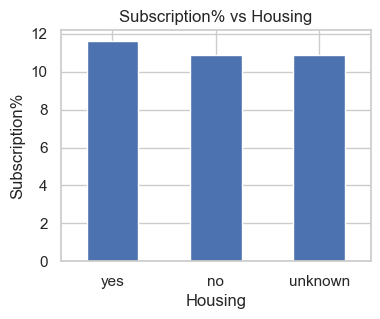

In [62]:
filter1=(df['y']=='yes')
housing1=df.loc[filter1, ['housing','y']].housing.value_counts()

filter0=(df['y']=='no')
housing0=df.loc[filter0, ['housing','y']].housing.value_counts()

yes_perc=housing1/(housing0+housing1)*100
yes_perc.plot(kind='bar', xlabel='Housing', ylabel='Subscription%', title='Subscription% vs Housing',figsize=(4,3), rot=0)

In [63]:
yes_perc

yes        11.608771
no         10.881110
unknown    10.862944
Name: housing, dtype: float64

In [64]:
from scipy.stats import chi2_contingency

In [65]:
# The contingency table:
pd.crosstab(df['housing'], df['y'])

y           no   yes
housing             
no       16446  2008
unknown    878   107
yes      18906  2483

In [66]:
# The calculation:

chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['housing'], df['y']))
p

0.06688320611386821

##### housing Summary: 
The p-value associated to the Chi-squared test equals to 0.06, which is higher than a 0.05-threshold but very close.So, for a confidence level of 95%, there’s no association between the dependent variable y and our feature housing.

suggestion: remove

####  loan (has personal loan)
Does the client have a personal loan?

In [67]:
#Look at the counts
df.loan.value_counts()

no         33655
yes         6188
unknown      985
Name: loan, dtype: int64

In [68]:
# Look at the percentages
df.loan.value_counts(normalize=True)

no         0.824312
yes        0.151563
unknown    0.024126
Name: loan, dtype: float64

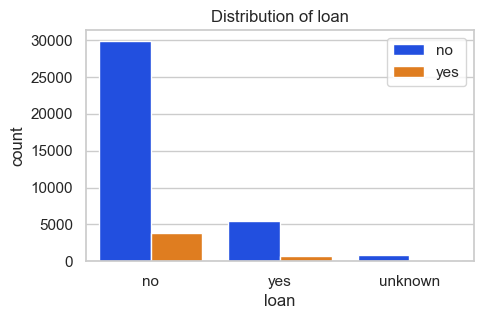

In [69]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x='loan',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of loan')
#plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Loan'}, xlabel='Loan', ylabel='Subscription%'>

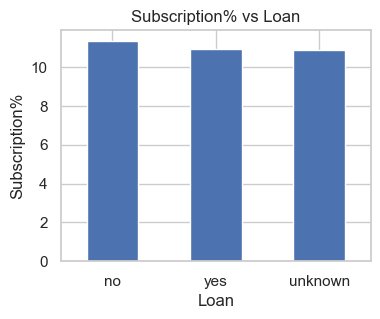

In [70]:
filter1=(df['y']=='yes')
loan1=df.loc[filter1, ['loan','y']].loan.value_counts()

filter0=(df['y']=='no')
loan0=df.loc[filter0, ['loan','y']].loan.value_counts()

yes_perc=loan1/(loan0+loan1)*100
yes_perc.plot(kind='bar', xlabel='Loan', ylabel='Subscription%', title='Subscription% vs Loan',figsize=(4,3), rot=0)

In [71]:
yes_perc

no         11.332640
yes        10.940530
unknown    10.862944
Name: loan, dtype: float64

In [72]:
pd.crosstab(df['loan'], df['y'])

y           no   yes
loan                
no       29841  3814
unknown    878   107
yes       5511   677

In [73]:
chi2, p, dof, ex = chi2_contingency(pd.crosstab(df['loan'], df['y']))
p

0.6172690260924748

##### loan Summary: 
The p-value associated to the Chi-squared test equals to 0.654, which is higher than a 0.05-threshold. So, for a confidence level of 95%, there’s no association between the dependent variable y and our feature loan. 

suggestion: We'll remove it from the dataset.

#### Distribution of all bank customer categorical data

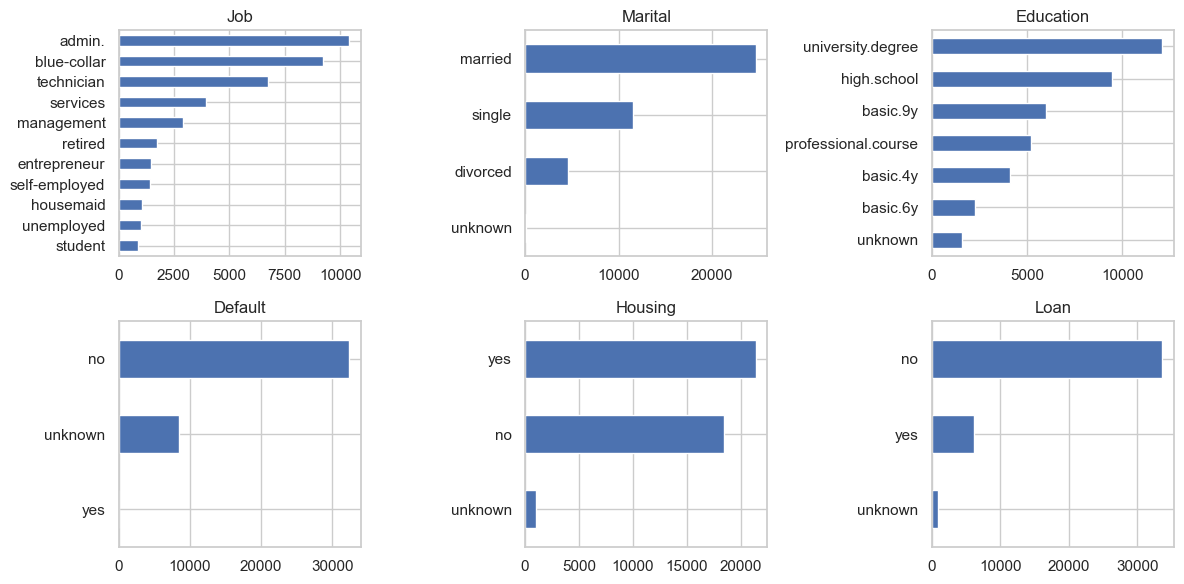

In [74]:
figure, ax = plt.subplots(2, 3, figsize=(12,6))

df.job.value_counts(ascending=True).plot(kind = 'barh', ax = ax[0, 0])
ax[0, 0].set_title("Job")
  
df.marital.value_counts(ascending=True).plot(kind = 'barh', ax = ax[0, 1])
ax[0, 1].set_title("Marital")
  

df.education.value_counts(ascending=True).plot(kind = 'barh', ax = ax[0, 2])
ax[0, 2].set_title("Education")
  

df.default.value_counts(ascending=True).plot(kind = 'barh', ax = ax[1, 0])
ax[1, 0].set_title("Default")

df.housing.value_counts(ascending=True).plot(kind = 'barh', ax = ax[1, 1])
ax[1, 1].set_title("Housing")

df.loan.value_counts(ascending=True).plot(kind = 'barh', ax = ax[1, 2])
ax[1, 2].set_title("Loan")

plt.tight_layout()

**Though we do not have missing values in our dataset, bank customer categogical data have unknown category which need to be imputed or deleted, or treated as a class label before modelling.**

##### <font color='red'>Bank Customers related attributes summary</font>
1. age: numerical; we label this numerical data into 3 catagorical groups (‘age_bin’) and do OneHotEncoder/Dummy transform.
2. job: categorical; we drop “unknown” level and will do OneHotEncoder/Dummy transform. 
3. marital: categorical; we drop “unknown” level and will do OneHotEncoder/Dummy transform.
4. education: categorical; we add the “unknown” level to “university.degree” level and will do OrdinalEncoder transformation.
5. default: categorical; remove.
6. housing: categorical; remove.
7. loan: categorical; remove.

### Current campaign attributes

Numeric(4): duration (last contact duration, in seconds), campaign (number of contacts performed during this campaign and for this client), pdays (number of days that passed by after the client was last contacted from a previous campaign; 999 means client was not previously contacted), previous(number of contacts performed before this campaign and for this client)

Categorical(4): contact(contact communication type), month(last contact month of year),day_of_week(last contact day of the week), poutcome (outcome of the previous marketing campaign)

#### duration (last contact duration, in seconds)

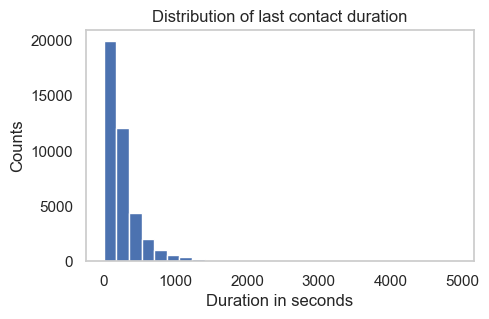

In [75]:
df.duration.plot(kind='hist',bins = 28, figsize=(5, 3))
plt.xlabel('Duration in seconds')
plt.ylabel('Counts')
plt.title('Distribution of last contact duration')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Duration Distribution')

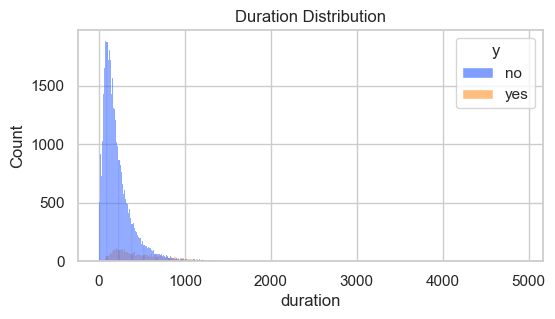

In [76]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(x='duration',hue= 'y', data=df, palette = 'bright')
plt.title('Duration Distribution')

Text(0.5, 1.0, 'Boxplot of duration')

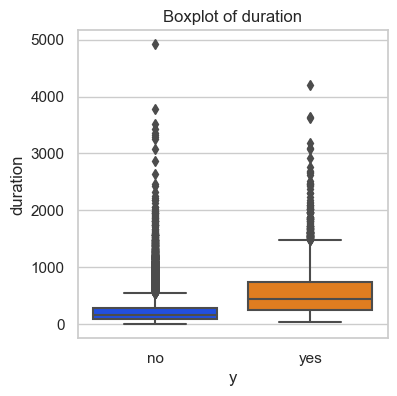

In [77]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(x='y', y = 'duration', data=df, palette = 'bright')
ax.set_title('Boxplot of duration')

In [78]:
# Look at the mean
df.duration.mean()

258.45833741549916

In [79]:
# Look at the median
df.duration.median()

180.0

In [80]:
df.duration.max()

4918

In [81]:
df.duration.min()

0

##### duration Summary: 
**Important note: the duration attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.**

suggestion: we'll remove it from the dataset.

#### campaign (number of contacts performed during this campaign and for this client)
How many times was the client contacted during this campaign?

In [82]:
df.campaign.value_counts()

1     17468
2     10499
3      5298
4      2627
5      1588
6       970
7       622
8       395
9       278
10      223
11      176
12      124
13       90
14       69
17       57
16       50
15       49
18       32
20       30
19       26
21       24
22       17
23       16
24       15
27       11
29       10
28        8
26        8
25        8
31        7
30        7
35        5
32        4
33        4
34        3
42        2
40        2
43        2
56        1
39        1
41        1
37        1
Name: campaign, dtype: int64

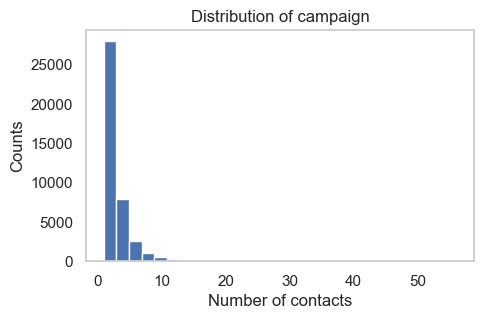

In [83]:
df.campaign.plot(kind='hist',bins = 28, figsize=(5, 3))
plt.xlabel('Number of contacts')
plt.ylabel('Counts')
plt.title('Distribution of campaign')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Campaign Distribution')

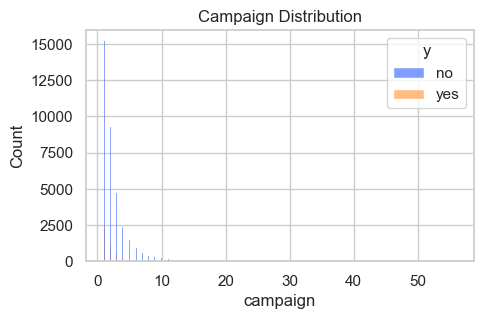

In [84]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.histplot(x='campaign',hue= 'y', data=df, palette = 'bright')
plt.title('Campaign Distribution')

<AxesSubplot: xlabel='campaign', ylabel='count'>

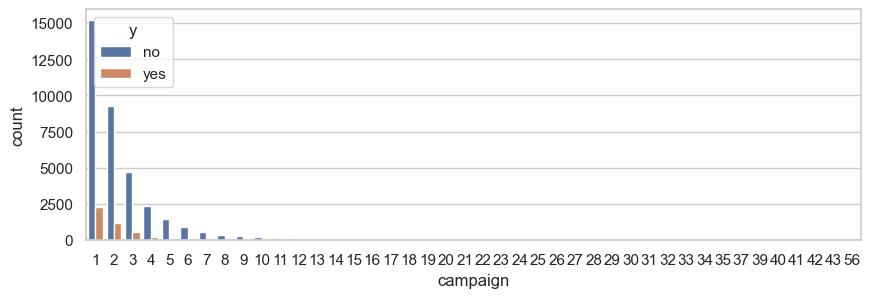

In [85]:
fig, ax = plt.subplots(figsize=(10,3))
sns.countplot(data=df, x='campaign', hue='y')

<AxesSubplot: title={'center': 'Subscription% vs Campaign'}, xlabel='Campaign', ylabel='Subscription%'>

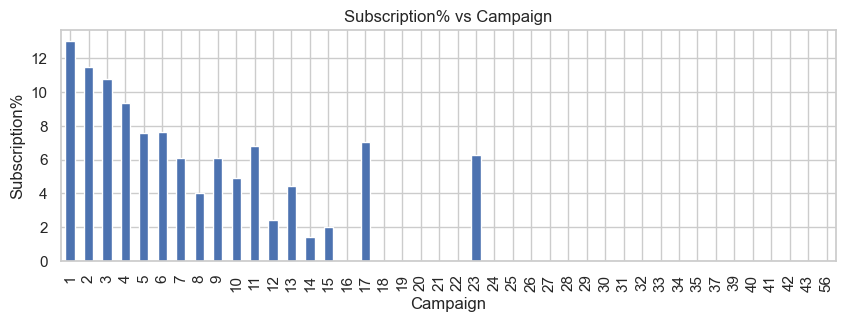

In [86]:
filter1=(df['y']=='yes')
campaign1=df.loc[filter1, ['campaign','y']].campaign.value_counts()

filter0=(df['y']=='no')
campaign0=df.loc[filter0, ['campaign','y']].campaign.value_counts()

yes_perc=campaign1/(campaign0+campaign1)*100
yes_perc.plot(kind='bar', xlabel='Campaign', ylabel='Subscription%', title='Subscription% vs Campaign',figsize=(10,3), rot=90)

Text(0.5, 1.0, 'Boxplot of campaign')

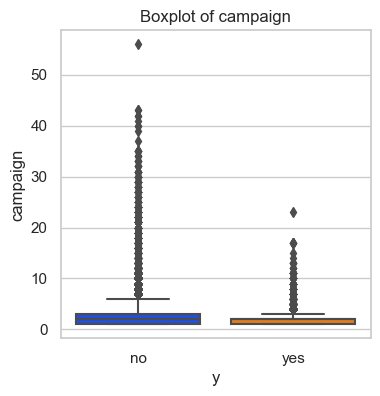

In [87]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(x='y', y = 'campaign', data=df, palette = 'bright')
ax.set_title('Boxplot of campaign')

In [88]:
print('1º Quartile: ', df['campaign'].quantile(q = 0.25))
print('2º Quartile: ', df['campaign'].quantile(q = 0.50))
print('3º Quartile: ', df['campaign'].quantile(q = 0.75))
print('4º Quartile: ', df['campaign'].quantile(q = 1.00))

print('campaign above: ', df['campaign'].quantile(q = 0.75) + 
                      1.5*(df['campaign'].quantile(q = 0.75) - df['campaign'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  1.0
2º Quartile:  2.0
3º Quartile:  3.0
4º Quartile:  56.0
campaign above:  6.0 are outliers


In [89]:
print('Numerber of outliers: ', df[df['campaign'] > 6.0]['campaign'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['campaign'] > 6.0]['campaign'].count()*100/len(df),2), '%')

Numerber of outliers:  2378
Number of clients:  40828
Outliers are: 5.82 %


In [90]:
# Look at the mean
df.campaign.mean()

2.56735573625943

In [91]:
# Look at the median()
df.campaign.median()

2.0

In [92]:
df.campaign.max()

56

In [93]:
df.campaign.min()

1

### campaign Summary: 
As we can see from the chart Calling more than 6 times a same person during a single marketing campaign is considered as excessive.    
We'll consider those as outliers(2372, 5.82%), even if marketing harrassment a real thing. However, harassment isn’t working at all.    
We'll lose a lot of information if we’re binning this variable.    
There's a linear pattern in substription rate depending on the different values of Campaign.

suggestion: we'll keep it.

#### pdays (number of days that passed by after the client was last contacted from a previous campaign; 999 means client was not previously contacted)

In [94]:
df.pdays.value_counts()

999    39334
3        431
6        405
4        117
9         64
7         60
2         59
12        58
10        52
5         46
13        35
11        28
1         25
15        24
14        20
8         17
0         15
16        11
17         8
18         7
22         3
19         3
21         2
25         1
26         1
27         1
20         1
Name: pdays, dtype: int64

In [95]:
df.pdays.value_counts(normalize=True).sort_index()

0      0.000367
1      0.000612
2      0.001445
3      0.010556
4      0.002866
5      0.001127
6      0.009920
7      0.001470
8      0.000416
9      0.001568
10     0.001274
11     0.000686
12     0.001421
13     0.000857
14     0.000490
15     0.000588
16     0.000269
17     0.000196
18     0.000171
19     0.000073
20     0.000024
21     0.000049
22     0.000073
25     0.000024
26     0.000024
27     0.000024
999    0.963407
Name: pdays, dtype: float64

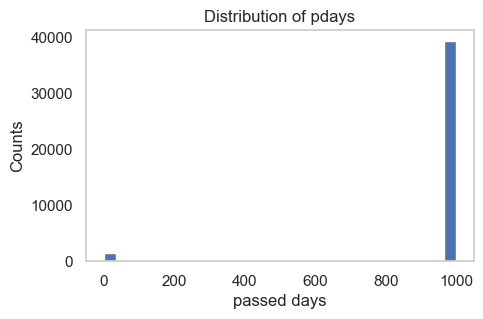

In [96]:
df.pdays.plot(kind='hist',bins = 28, figsize=(5,3))
plt.xlabel('passed days')
plt.ylabel('Counts')
plt.title('Distribution of pdays')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Pdays Distribution')

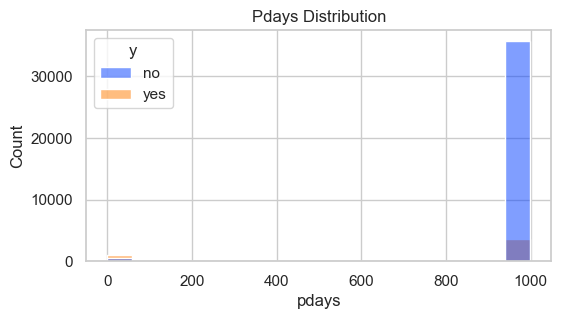

In [97]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(x='pdays',hue= 'y', data=df, palette = 'bright')
plt.title('Pdays Distribution')

<AxesSubplot: title={'center': 'Subscription% vs Pdays'}, xlabel='Pdays', ylabel='Subscription%'>

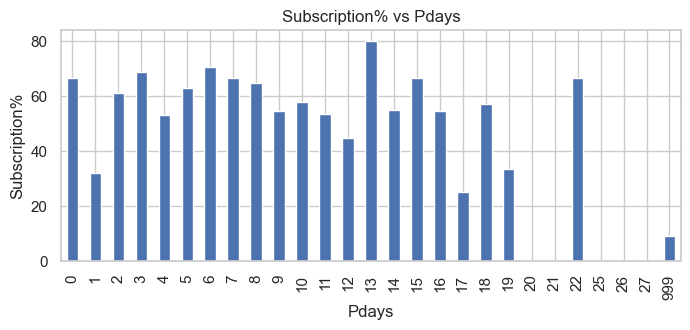

In [98]:
filter1=(df['y']=='yes')
pdays1=df.loc[filter1, ['pdays','y']].pdays.value_counts()

filter0=(df['y']=='no')
pdays0=df.loc[filter0, ['pdays','y']].pdays.value_counts()

yes_perc=pdays1/(pdays0+pdays1)*100
yes_perc.plot(kind='bar', xlabel='Pdays', ylabel='Subscription%', title='Subscription% vs Pdays',figsize=(8,3), rot=90)

In [99]:
yes_perc

0      66.666667
1      32.000000
2      61.016949
3      68.677494
4      52.991453
5      63.043478
6      70.617284
7      66.666667
8      64.705882
9      54.687500
10     57.692308
11     53.571429
12     44.827586
13     80.000000
14     55.000000
15     66.666667
16     54.545455
17     25.000000
18     57.142857
19     33.333333
20           NaN
21           NaN
22     66.666667
25           NaN
26           NaN
27           NaN
999     9.251538
Name: pdays, dtype: float64

Text(0.5, 1.0, 'Boxplot of pdays')

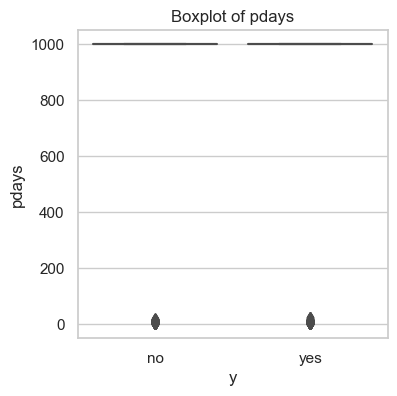

In [100]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(x='y', y = 'pdays', data=df, palette = 'bright')
ax.set_title('Boxplot of pdays')

In [101]:

print('1º Quartile: ', df['pdays'].quantile(q = 0.25))
print('2º Quartile: ', df['pdays'].quantile(q = 0.50))
print('3º Quartile: ', df['pdays'].quantile(q = 0.75))
print('4º Quartile: ', df['pdays'].quantile(q = 1.00))

print('pdays above: ', df['pdays'].quantile(q = 0.75) + 
                      1.5*(df['pdays'].quantile(q = 0.75) - df['pdays'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  999.0
2º Quartile:  999.0
3º Quartile:  999.0
4º Quartile:  999.0
pdays above:  999.0 are outliers


In [102]:
print('Numerber of outliers: ', df[df['pdays'] > 69.6]['pdays'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['pdays'] > 69.6]['pdays'].count()*100/len(df),2), '%')


Numerber of outliers:  39334
Number of clients:  40828
Outliers are: 96.34 %


##### pdays summary
Recontacting a client after a previous campaign seems to highly increase the odds of subscription.
uncontacted customers take over 96% of total customers, while contacted ones only accounts for less than 4%.
    
suggestion: we'll keep it as a categorical variable (pdays_bin) with 5 groups.

In [103]:
df['pdays_bin'] = pd.cut(df['pdays'], [0, 6, 13,  20, 30, 999], 
                       labels=['0-6', '7-13', '14-20', '21-27','-1'])

In [104]:
df['pdays_bin'].value_counts()

-1       39334
0-6       1083
7-13       314
14-20       74
21-27        8
Name: pdays_bin, dtype: int64

#### previous(number of contacts performed before this campaign and for this client)

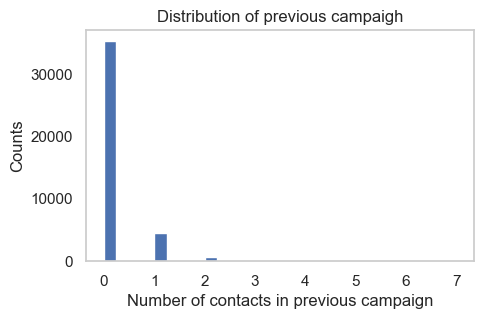

In [105]:
df.previous.plot(kind='hist',bins = 28, figsize=(5, 3))
plt.xlabel('Number of contacts in previous campaign')
plt.ylabel('Counts')
plt.title('Distribution of previous campaigh')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Previous Distribution')

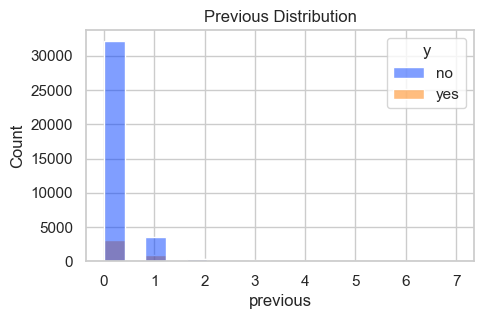

In [106]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.histplot(x='previous',hue= 'y', data=df, palette = 'bright')
plt.title('Previous Distribution')

<AxesSubplot: xlabel='previous', ylabel='count'>

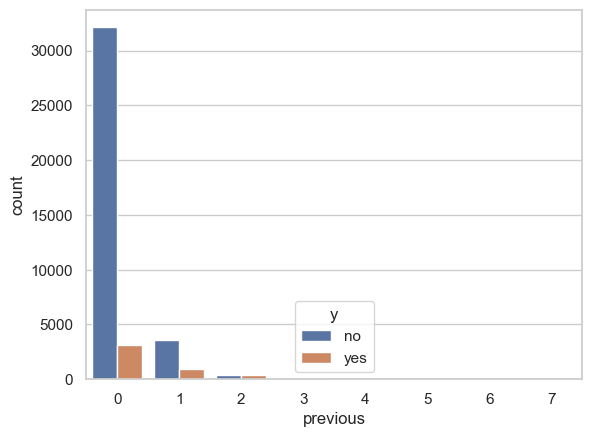

In [107]:
sns.countplot(data=df, x='previous', hue='y')

<AxesSubplot: title={'center': 'Subscription% vs Previous'}, xlabel='Previous', ylabel='Subscription%'>

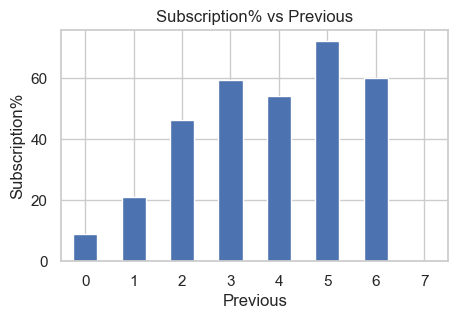

In [108]:
filter1=(df['y']=='yes')
previous1=df.loc[filter1, ['previous','y']].previous.value_counts()

filter0=(df['y']=='no')
previous0=df.loc[filter0, ['previous','y']].previous.value_counts()

yes_perc=previous1/(previous0+previous1)*100
yes_perc.plot(kind='bar', xlabel='Previous', ylabel='Subscription%', title='Subscription% vs Previous',figsize=(5,3), rot=0)

Text(0.5, 1.0, 'Boxplot of previous')

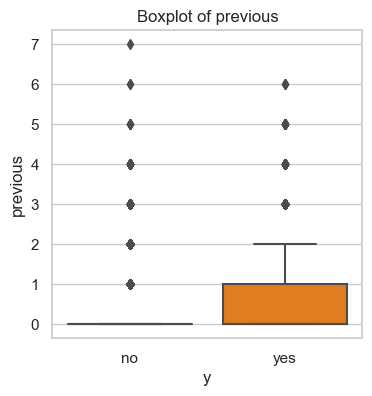

In [109]:
fig, ax = plt.subplots(figsize=(4,4))
sns.boxplot(x='y', y = 'previous', data=df, palette = 'bright')
ax.set_title('Boxplot of previous')

In [110]:
print('1º Quartile: ', df['previous'].quantile(q = 0.25))
print('2º Quartile: ', df['previous'].quantile(q = 0.50))
print('3º Quartile: ', df['previous'].quantile(q = 0.75))
print('4º Quartile: ', df['previous'].quantile(q = 1.00))
print('previous above: ', df['previous'].quantile(q = 0.75) + 
                      1.5*(df['previous'].quantile(q = 0.75) - df['previous'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  0.0
2º Quartile:  0.0
3º Quartile:  0.0
4º Quartile:  7.0
previous above:  0.0 are outliers


In [111]:
print('Numerber of outliers: ', df[df['previous'] > 0.0]['previous'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['previous'] > 0.0]['previous'].count()*100/len(df),2), '%')

Numerber of outliers:  5586
Number of clients:  40828
Outliers are: 13.68 %


In [112]:
# Look at the counts
df.previous.value_counts()

0    35242
1     4534
2      744
3      214
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [113]:
# Look at the percentages
df.previous.value_counts(normalize=True)

0    0.863182
1    0.111051
2    0.018223
3    0.005242
4    0.001715
5    0.000441
6    0.000122
7    0.000024
Name: previous, dtype: float64

##### previous summary
It seems that more contacts performed higher subscription rate will be.

suggestion: we'll keep this numerical variable.

#### Distribution of current campaign numeric data

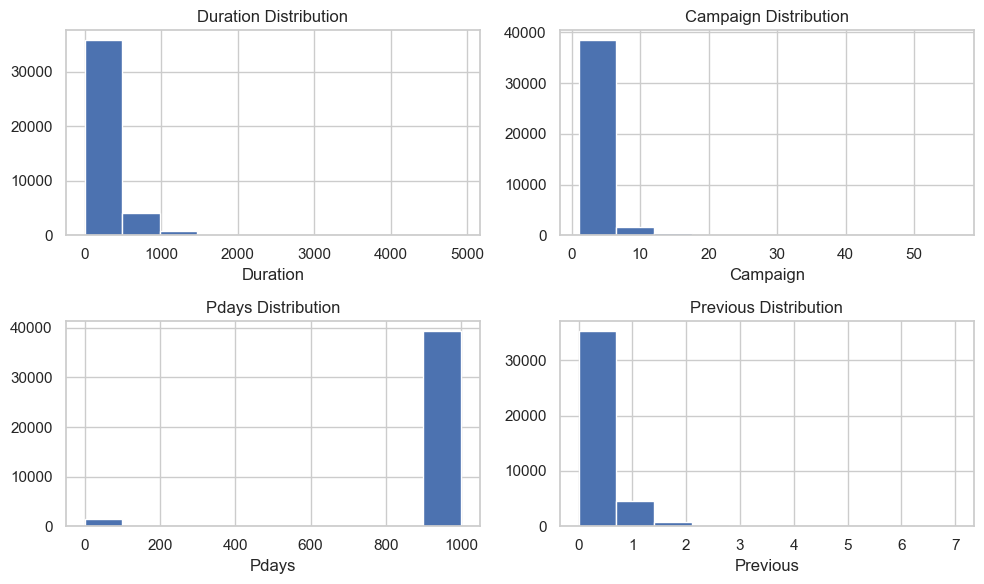

In [114]:
fig = plt.figure(figsize=(10, 6), dpi = 100)
plt.subplot(221)
plt.hist(df.duration)
plt.xlabel('Duration')
plt.title('Duration Distribution')

plt.subplot(222)
plt.hist(df.campaign)
plt.xlabel('Campaign')
plt.title('Campaign Distribution')

plt.subplot(223)
plt.hist(df.pdays)
plt.xlabel('Pdays')
plt.title('Pdays Distribution')

plt.subplot(224)
plt.hist(df.previous)
plt.xlabel('Previous')
plt.title('Previous Distribution')

fig.tight_layout()
plt.show()

#### contact (contact communication type)

In [115]:
# Look at the counts
df.contact.value_counts()

cellular     25952
telephone    14876
Name: contact, dtype: int64

In [116]:
# Look at the percentages
df.contact.value_counts(normalize=True)

cellular     0.635642
telephone    0.364358
Name: contact, dtype: float64

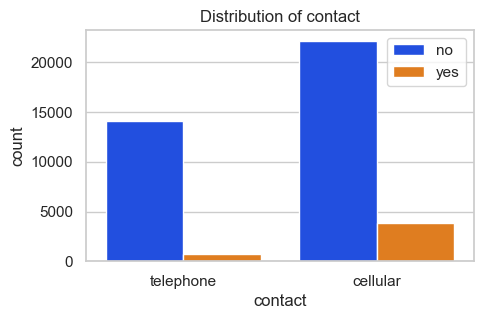

In [117]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x='contact',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of contact')
#plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Contact'}, xlabel='Contact', ylabel='Subscription%'>

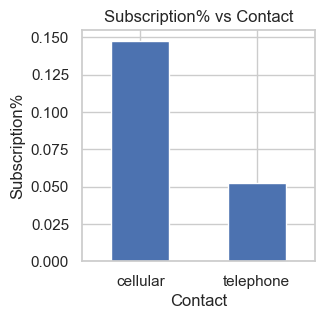

In [118]:
filter1=(df['y']=='yes')
contact1=df.loc[filter1, ['contact','y']].contact.value_counts()

filter0=(df['y']=='no')
contact0=df.loc[filter0, ['contact','y']].contact.value_counts()

yes_perc=contact1/(contact0+contact1)
yes_perc.plot(kind='bar', xlabel='Contact', ylabel='Subscription%', title='Subscription% vs Contact',figsize=(3,3), rot=0)

In [119]:
yes_perc

cellular     0.147310
telephone    0.052097
Name: contact, dtype: float64

##### contact summary
14.7% of cellular responders subscribed to a term deposit while only 5.2% of telephone responders did.

suggestion: we'll use oneHot/dummy transform it to numerical data.

#### month (last contact month of year)

In [120]:
# Look at the counts
df.month.value_counts()

may    13644
jul     7112
aug     6111
jun     5256
nov     4090
apr     2620
oct      709
sep      562
mar      544
dec      180
Name: month, dtype: int64

In [121]:
# Look at the percentages
df.month.value_counts(normalize=True)

may    0.334182
jul    0.174194
aug    0.149677
jun    0.128735
nov    0.100176
apr    0.064172
oct    0.017366
sep    0.013765
mar    0.013324
dec    0.004409
Name: month, dtype: float64

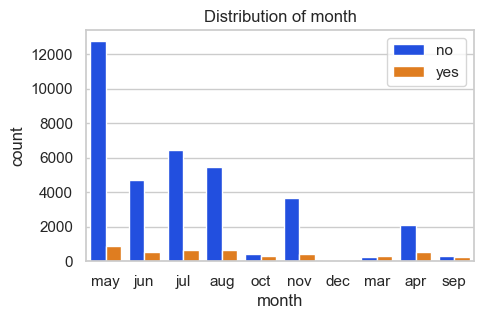

In [122]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x='month',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of month')
#plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Month'}, xlabel='Month', ylabel='Subscription%'>

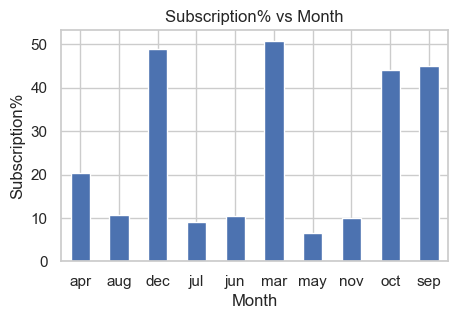

In [123]:
filter1=(df['y']=='yes')
month1=df.loc[filter1, ['month','y']].month.value_counts()

filter0=(df['y']=='no')
month0=df.loc[filter0, ['month','y']].month.value_counts()

yes_perc=month1/(month0+month1)*100
yes_perc.plot(kind='bar', xlabel='Month', ylabel='Subscription%', title='Subscription% vs Month',figsize=(5,3), rot=0)

In [124]:
yes_perc

apr    20.458015
aug    10.603829
dec    48.888889
jul     9.012936
jun    10.445205
mar    50.735294
may     6.471709
nov    10.073350
oct    44.005642
sep    45.017794
Name: month, dtype: float64

##### month summary
No contacts in Jan and Feb.   
The highest spike occurs during May, with 33.4% of total contacts, but it has the worst ratio of subscribers over persons contacted (6.5%). 
Every month with a very low frequency of contact (march, september, october and december) shows very good results (between 44% and 51% of subscribers). 
December aside, there are enough observations to conclude this isn’t pure luck, so this feature will probably be very important in models.

suggestion: we'll use OneHot/dummy to transform this variable into numerical data.

#### day_of_week (last contact day of the week)

In [125]:
# Look at the counts
df.day_of_week.value_counts()

thu    8541
mon    8433
wed    8062
tue    8007
fri    7785
Name: day_of_week, dtype: int64

In [126]:
# Look at the percentages
df.day_of_week.value_counts(normalize=True)

thu    0.209195
mon    0.206549
wed    0.197463
tue    0.196115
fri    0.190678
Name: day_of_week, dtype: float64

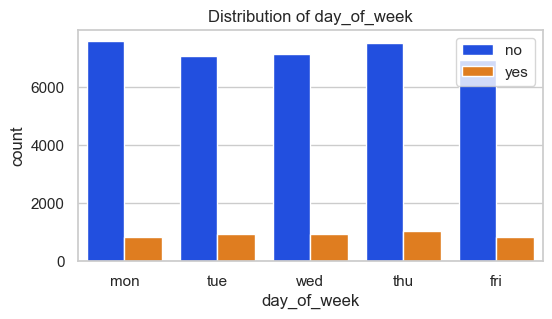

In [127]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.countplot(x='day_of_week',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of day_of_week')
#plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Day_of_week'}, xlabel='Day_of_week', ylabel='Subscription%'>

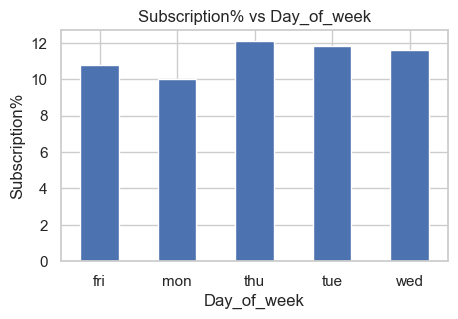

In [128]:
filter1=(df['y']=='yes')
day_of_week1=df.loc[filter1, ['day_of_week','y']].day_of_week.value_counts()

filter0=(df['y']=='no')
day_of_week0=df.loc[filter0, ['day_of_week','y']].day_of_week.value_counts()

yes_perc=day_of_week1/(day_of_week0+day_of_week1)*100
yes_perc.plot(kind='bar', xlabel='Day_of_week', ylabel='Subscription%', title='Subscription% vs Day_of_week',figsize=(5,3), rot=0)

In [129]:
yes_perc

fri    10.789981
mon    10.008301
thu    12.094603
tue    11.802173
wed    11.610022
Name: day_of_week, dtype: float64

##### day_of_week summary
Thursdays tend to show better results (12.1% of subscribers among calls made this day) unlike Mondays with only 10.0% of successful calls.

suggestion: we'll use OneHot/dummy to transform this variable into numerical data.

#### poutcome (outcome of the previous marketing campaign)

In [130]:
# Look at the counts
df.poutcome.value_counts()

nonexistent    35242
failure         4233
success         1353
Name: poutcome, dtype: int64

In [131]:
# Look at the percentages
df.poutcome.value_counts(normalize=True)

nonexistent    0.863182
failure        0.103679
success        0.033139
Name: poutcome, dtype: float64

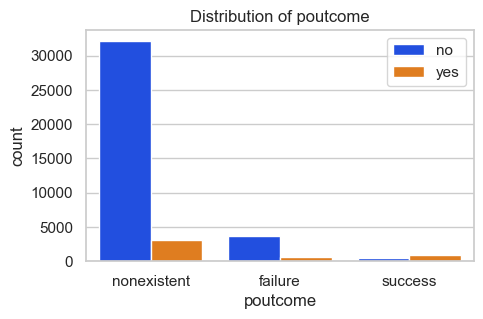

In [132]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.countplot(x='poutcome',hue= 'y', data=df, palette = 'bright')
ax.set_title('Distribution of poutcome')
#plt.xticks(rotation = 25)
plt.legend(loc='upper right')

<AxesSubplot: title={'center': 'Subscription% vs Poutcome'}, xlabel='Poutcome', ylabel='Subscription%'>

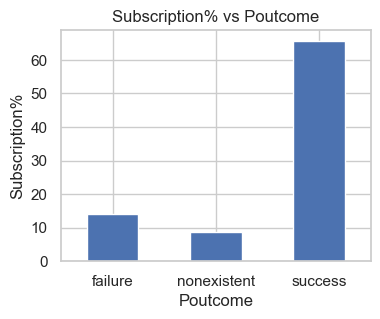

In [133]:
filter1=(df['y']=='yes')
poutcome1=df.loc[filter1, ['poutcome','y']].poutcome.value_counts()

filter0=(df['y']=='no')
poutcome0=df.loc[filter0, ['poutcome','y']].poutcome.value_counts()

yes_perc=poutcome1/(poutcome0+poutcome1)*100
yes_perc.plot(kind='bar', xlabel='Poutcome', ylabel='Subscription%', title='Subscription% vs Poutcome',figsize=(4,3), rot=0)

In [134]:
yes_perc

failure        14.079849
nonexistent     8.838885
success        65.558019
Name: poutcome, dtype: float64

##### poutcome summary
65.6% of people who already subscribed to a term deposit after a previous contact have accepted to do it again.    
Even if they denied before, they’re still more enthusiastic to accept it (14.1%) than people who haven’t been contacted before (9.0%).   
So even if the previous campaign was a failure, recontacting people is important. 

suggestion: we'll use OneHot/dummy to transform this variable into numerical data.

#### Distribution of current campaign categorical data

Text(0.5, 1.0, 'Prevous campaign outcome')

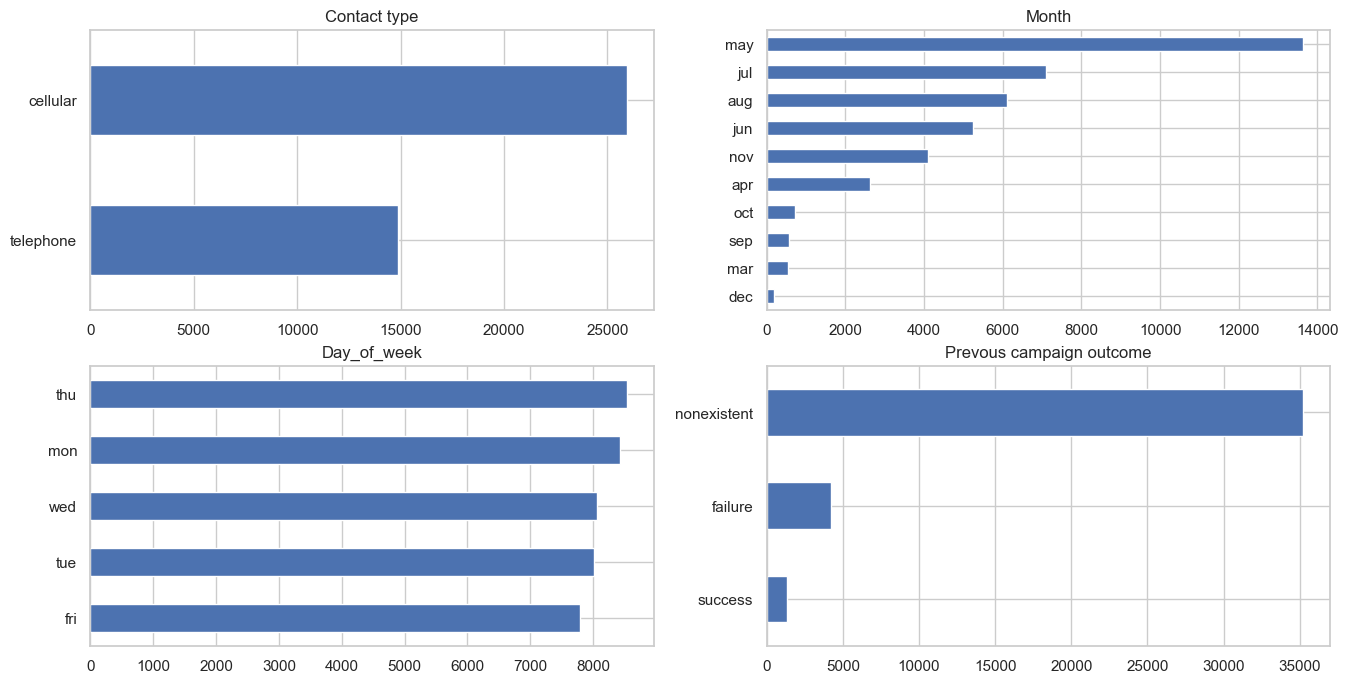

In [135]:
figure, ax = plt.subplots(2, 2, figsize=(16,8))

df.contact.value_counts(ascending=True).plot(kind = 'barh', ax = ax[0,0])
ax[0,0].set_title("Contact type")
  
df.month.value_counts(ascending=True).plot(kind = 'barh', ax = ax[0,1])
ax[0,1].set_title("Month")
  
df.day_of_week.value_counts(ascending=True).plot(kind = 'barh', ax = ax[1,0])
ax[1,0].set_title("Day_of_week")

df.poutcome.value_counts(ascending=True).plot(kind = 'barh', ax = ax[1,1])
ax[1,1].set_title("Prevous campaign outcome")

##### <font color='red'>Marketting Campaigns related attributes summary</font>
1. duration: numerical; remove.
2. campaign: numerical; keep.
3. pdays: numerical; keep.
4. previous: numerical; keep.
5. contact: categorical; we’ll use oneHot/dummy transform it to numerical data.
6. month: categorical; we'll use OneHot/dummy to transform this variable into numerical data.
7. day_of_week: categorical; we'll use OneHot/dummy to transform this variable into numerical data.
8. poutcome: categorical; we'll use OneHot/dummy to transform this variable into numerical data.   

### Social and economic context attributes

Numeric(5):emp_var_rate (employment variation rate - quarterly indicator), cons.price.idx (consumer price index - monthly indicator), cons.conf.idx (consumer confidence index - monthly indicator), euribor3m (euribor 3 month rate - daily indicator), nr.employed (number of employees - quarterly indicator)

#### emp_var_rate (employment variation rate - quarterly indicator)

In [136]:
# Look at the counts
df.emp_var_rate.value_counts()

 1.4    16076
-1.8     9147
 1.1     7661
-0.1     3675
-2.9     1640
-3.4     1054
-1.7      763
-1.1      632
-3.0      170
-0.2       10
Name: emp_var_rate, dtype: int64

In [137]:
# Look at the percentages
df.emp_var_rate.value_counts(normalize=True)

 1.4    0.393749
-1.8    0.224037
 1.1    0.187641
-0.1    0.090012
-2.9    0.040169
-3.4    0.025816
-1.7    0.018688
-1.1    0.015480
-3.0    0.004164
-0.2    0.000245
Name: emp_var_rate, dtype: float64

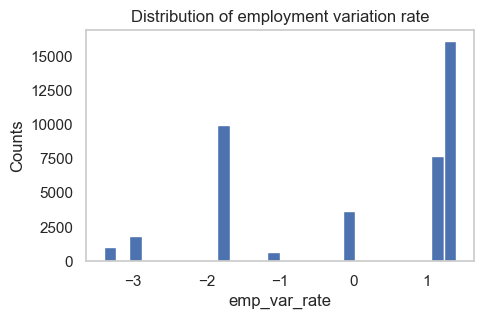

In [138]:
df['emp_var_rate'].plot(kind='hist',bins = 28, figsize=(5, 3))
plt.xlabel('emp_var_rate')
plt.ylabel('Counts')
plt.title('Distribution of employment variation rate')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Distribution of employment variation rate')

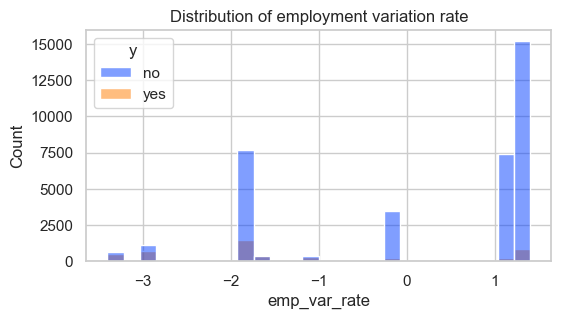

In [139]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(x='emp_var_rate',hue= 'y', data=df, palette = 'bright')
plt.title('Distribution of employment variation rate')

<AxesSubplot: title={'center': 'Subscription% vs emp_var_rate'}, xlabel='emp_var_rate', ylabel='Subscription%'>

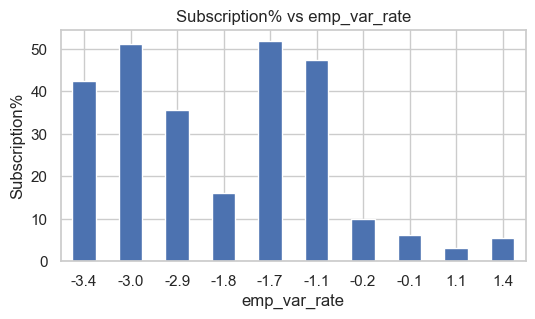

In [140]:
filter1=(df['y']=='yes')
emp_var_rate1=df.loc[filter1, ['emp_var_rate','y']].emp_var_rate.value_counts()

filter0=(df['y']=='no')
emp_var_rate0=df.loc[filter0, ['emp_var_rate','y']].emp_var_rate.value_counts()

yes_perc=emp_var_rate1/(emp_var_rate0+emp_var_rate1)*100
yes_perc.plot(kind='bar', xlabel='emp_var_rate', ylabel='Subscription%', title='Subscription% vs emp_var_rate',figsize=(6,3), rot=0)

In [141]:
yes_perc

-3.4    42.504744
-3.0    51.176471
-2.9    35.670732
-1.8    15.928720
-1.7    51.900393
-1.1    47.468354
-0.2    10.000000
-0.1     6.231293
 1.1     3.106644
 1.4     5.330928
Name: emp_var_rate, dtype: float64

Text(0.5, 1.0, 'Boxplot of employment variation rate')

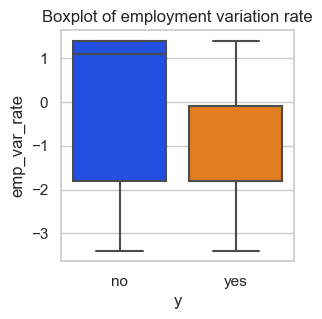

In [142]:
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(x='y', y = 'emp_var_rate', data=df, palette = 'bright')
ax.set_title('Boxplot of employment variation rate')

##### emp_var_rate summary
It seems that the bigger emp_var_rate the less people will make a term deposite subscription. 

suggestion: we'll do the collinearity analysis of these five continious social and economic. They’re supposed to be highly correlated.

#### cons_price_idx (consumer price index - monthly indicator)

In [143]:
# Look at the counts
df.cons_price_idx.value_counts()

93.994    7661
93.918    6630
92.893    5775
93.444    5119
94.465    4327
93.200    3609
93.075    2446
92.201     761
92.963     703
92.431     440
92.649     354
94.215     306
94.199     302
92.843     281
93.369     263
92.379     260
94.027     231
94.055     226
93.876     208
94.601     203
92.469     176
93.749     174
92.713     170
94.767     127
93.798      66
92.756      10
Name: cons_price_idx, dtype: int64

In [144]:
df.cons_price_idx.value_counts(normalize=True)

93.994    0.187641
93.918    0.162389
92.893    0.141447
93.444    0.125380
94.465    0.105981
93.200    0.088395
93.075    0.059910
92.201    0.018639
92.963    0.017219
92.431    0.010777
92.649    0.008671
94.215    0.007495
94.199    0.007397
92.843    0.006883
93.369    0.006442
92.379    0.006368
94.027    0.005658
94.055    0.005535
93.876    0.005095
94.601    0.004972
92.469    0.004311
93.749    0.004262
92.713    0.004164
94.767    0.003111
93.798    0.001617
92.756    0.000245
Name: cons_price_idx, dtype: float64

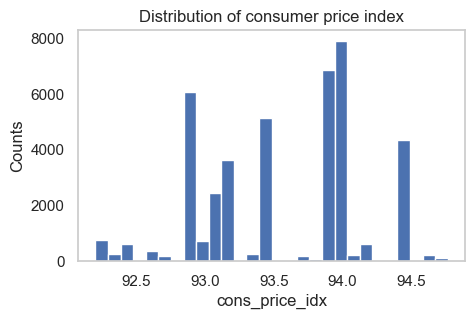

In [145]:
df['cons_price_idx'].plot(kind='hist',bins = 28, figsize=(5, 3))
plt.xlabel('cons_price_idx')
plt.ylabel('Counts')
plt.title('Distribution of consumer price index')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Distribution of consumer price index')

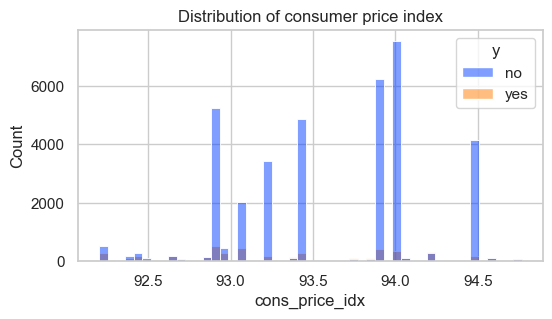

In [146]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(x='cons_price_idx',hue= 'y', data=df, palette = 'bright')
plt.title('Distribution of consumer price index')

<AxesSubplot: title={'center': 'Subscription% vs cons_price_idx'}, xlabel='cons_price_idx', ylabel='Subscription%'>

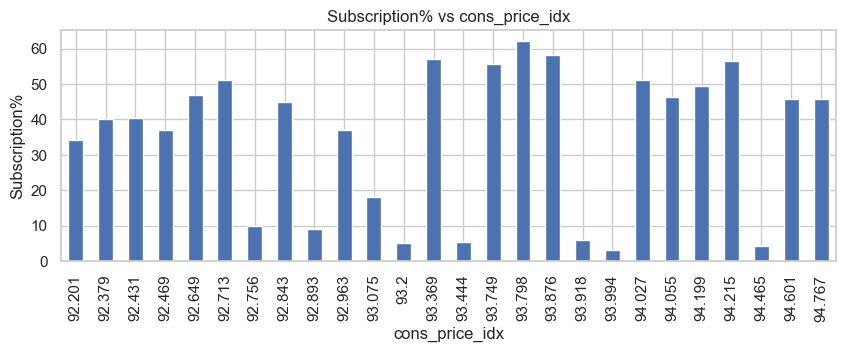

In [147]:
filter1=(df['y']=='yes')
cons_price_idx1=df.loc[filter1, ['cons_price_idx','y']].cons_price_idx.value_counts()

filter0=(df['y']=='no')
cons_price_idx0=df.loc[filter0, ['cons_price_idx','y']].cons_price_idx.value_counts()

yes_perc=cons_price_idx1/(cons_price_idx0+cons_price_idx1)*100
yes_perc.plot(kind='bar', xlabel='cons_price_idx', ylabel='Subscription%', title='Subscription% vs cons_price_idx',figsize=(10,3), rot=90)

Text(0.5, 1.0, 'Boxplot of consumer price index')

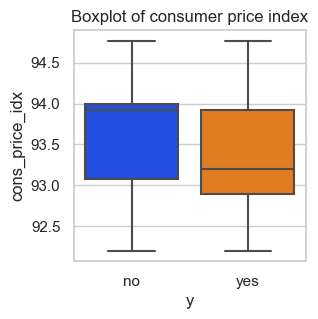

In [148]:
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(x='y', y = 'cons_price_idx', data=df, palette = 'bright')
ax.set_title('Boxplot of consumer price index')

In [149]:
# Look at the mean
df. cons_price_idx.mean()

93.5746761781617

In [150]:
# Look at the median
df. cons_price_idx.median()

93.749

##### cons_price_idx summary

suggestion: we'll do the collinearity analysis of these five continious social and economic.

#### cons_conf_idx (consumer confidence index - monthly indicator)

In [151]:
# Look at the counts
df.cons_conf_idx.value_counts()

-36.4    7661
-42.7    6630
-46.2    5775
-36.1    5119
-41.8    4327
-42.0    3609
-47.1    2446
-31.4     761
-40.8     703
-26.9     440
-30.1     354
-40.3     306
-37.5     302
-50.0     281
-34.8     263
-29.8     260
-38.3     231
-39.8     226
-40.0     208
-49.5     203
-33.6     176
-34.6     174
-33.0     170
-50.8     127
-40.4      66
-45.9      10
Name: cons_conf_idx, dtype: int64

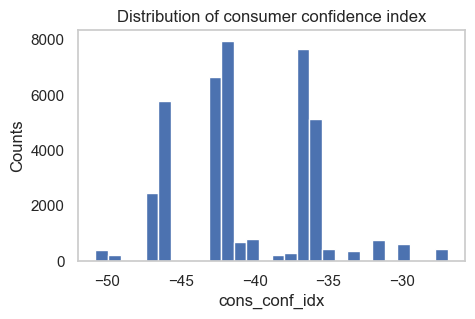

In [152]:
df['cons_conf_idx'].plot(kind='hist',bins = 28, figsize=(5, 3))
plt.xlabel('cons_conf_idx')
plt.ylabel('Counts')
plt.title('Distribution of consumer confidence index')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Distribution of consumer confidence index')

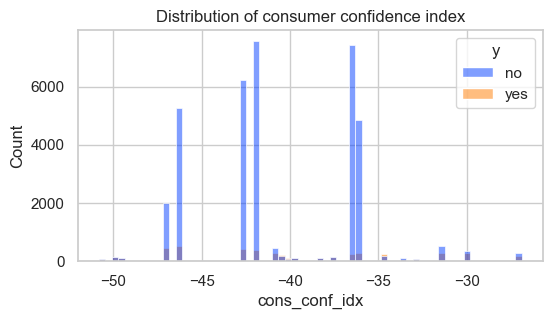

In [153]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(x='cons_conf_idx',hue= 'y', data=df, palette = 'bright')
plt.title('Distribution of consumer confidence index')

<AxesSubplot: title={'center': 'Subscription% vs cons_conf_idx'}, xlabel='cons_conf_idx', ylabel='Subscription%'>

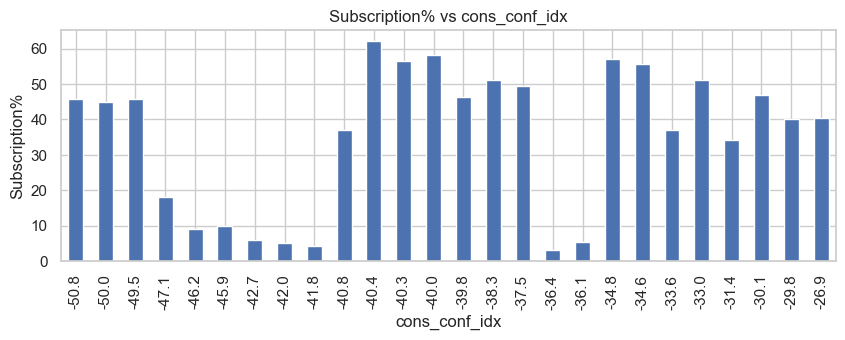

In [154]:
filter1=(df['y']=='yes')
cons_conf_idx1=df.loc[filter1, ['cons_conf_idx','y']].cons_conf_idx.value_counts()

filter0=(df['y']=='no')
cons_conf_idx0=df.loc[filter0, ['cons_conf_idx','y']].cons_conf_idx.value_counts()

yes_perc=cons_conf_idx1/(cons_conf_idx0+cons_conf_idx1)*100
yes_perc.plot(kind='bar', xlabel='cons_conf_idx', ylabel='Subscription%', title='Subscription% vs cons_conf_idx',figsize=(10,3), rot=90)

Text(0.5, 1.0, 'Boxplot of consumer confidence index')

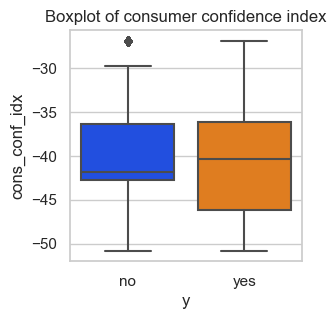

In [155]:
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(x='y', y = 'cons_conf_idx', data=df, palette = 'bright')
ax.set_title('Boxplot of consumer confidence index')

In [156]:
# Quartiles
print('1º Quartile: ', df['cons_conf_idx'].quantile(q = 0.25))
print('2º Quartile: ', df['cons_conf_idx'].quantile(q = 0.50))
print('3º Quartile: ', df['cons_conf_idx'].quantile(q = 0.75))
print('4º Quartile: ', df['cons_conf_idx'].quantile(q = 1.00))

print('cons_conf_idx above: ', df['cons_conf_idx'].quantile(q = 0.75) + 
                      1.5*(df['cons_conf_idx'].quantile(q = 0.75) - df['cons_conf_idx'].quantile(q = 0.25)), 'are outliers')

1º Quartile:  -42.7
2º Quartile:  -41.8
3º Quartile:  -36.4
4º Quartile:  -26.9
cons_conf_idx above:  -26.949999999999992 are outliers


In [157]:
print('Numerber of outliers: ', df[df['cons_conf_idx'] > -26.95]['cons_conf_idx'].count())
print('Number of clients: ', len(df))
#Outliers in %
print('Outliers are:', round(df[df['cons_conf_idx'] > -26.95]['cons_conf_idx'].count()*100/len(df),2), '%')

Numerber of outliers:  440
Number of clients:  40828
Outliers are: 1.08 %


##### cons_conf_idx summary
It shows different patterns as cons_conf_idx increasing.   
There are outliers(440, 1.08%).But it's in a normal range of consumer confidence index in real world.

suggestion: we'll keep the outliers and do the collinearity analysis of these five continious social and economic.

#### euribor3m (euribor 3 month rate - daily indicator)

In [158]:
df.euribor3m.value_counts()

4.857    2831
4.962    2586
4.963    2464
4.961    1881
4.856    1196
         ... 
3.901       1
3.428       1
3.053       1
3.282       1
0.996       1
Name: euribor3m, Length: 316, dtype: int64

In [159]:
df.euribor3m.max()

5.045

In [160]:
df.euribor3m.min()

0.634

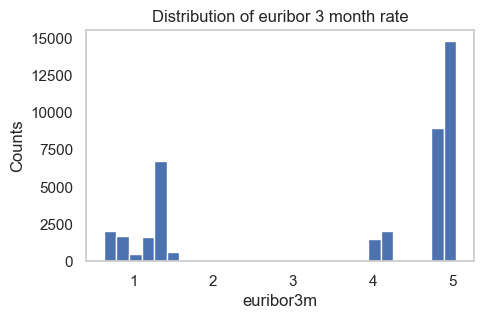

In [161]:
df['euribor3m'].plot(kind='hist',bins = 28,figsize=(5, 3))
plt.xlabel('euribor3m')
plt.ylabel('Counts')
plt.title('Distribution of euribor 3 month rate')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Distribution of euribor 3 month rate')

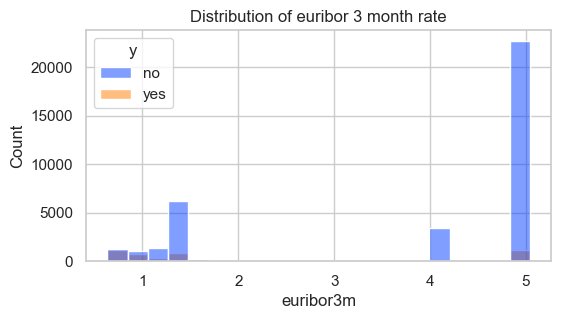

In [162]:
fig, ax = plt.subplots(figsize=(6,3))
sns.set_style('whitegrid')
sns.histplot(x='euribor3m',hue= 'y', data=df, palette = 'bright')
plt.title('Distribution of euribor 3 month rate')

Text(0.5, 1.0, 'Boxplot of euribor 3 month rate')

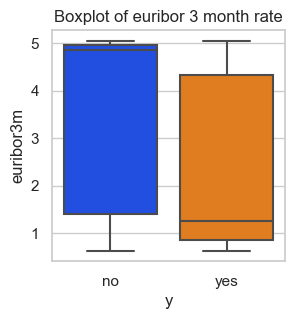

In [163]:
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(x='y', y = 'euribor3m', data=df, palette = 'bright')
ax.set_title('Boxplot of euribor 3 month rate')

<AxesSubplot: title={'center': 'Subscription% vs euribor3m'}, xlabel='euribor3m', ylabel='Subscription%'>

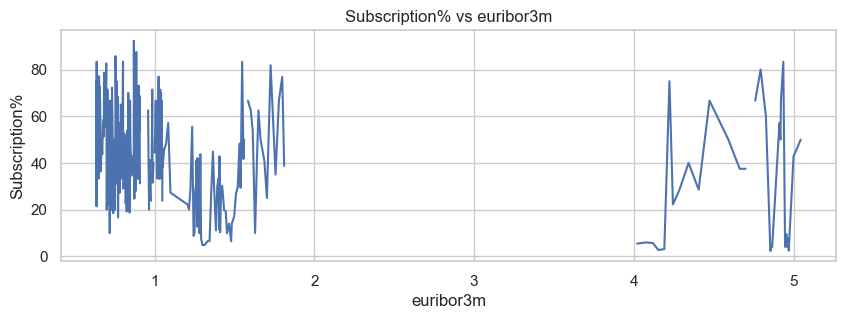

In [164]:
filter1=(df['y']=='yes')
euribor3m1=df.loc[filter1, ['euribor3m','y']].euribor3m.value_counts()

filter0=(df['y']=='no')
euribor3m0=df.loc[filter0, ['euribor3m','y']].euribor3m.value_counts()

yes_perc=euribor3m1/(euribor3m0+euribor3m1)*100
yes_perc.plot(xlabel='euribor3m', ylabel='Subscription%', title='Subscription% vs euribor3m',figsize=(10,3), rot=0, )

In [165]:
yes_perc

0.634    75.000000
0.635    51.162791
0.636    21.428571
0.637    83.333333
0.638    71.428571
           ...    
4.967     5.172414
4.968     5.804481
4.970     2.469136
5.000    42.857143
5.045    50.000000
Name: euribor3m, Length: 316, dtype: float64

##### euribor3m summary
When the interest rate is between 1.8-4.0, the bank has very few customers and almost no customers subscribe the term deposit.    
This is mainly due to the economic crisis and rapid adjustment of interest rates.


suggestion: we'll do the collinearity analysis of these five continious social and economic.

#### nr_employed (number of employees - quarterly indicator)

In [166]:
df.nr_employed.value_counts()

5228.1    16076
5099.1     8502
5191.0     7661
5195.8     3675
5076.2     1640
5017.5     1054
4991.6      763
5008.7      645
4963.6      632
5023.5      170
5176.3       10
Name: nr_employed, dtype: int64

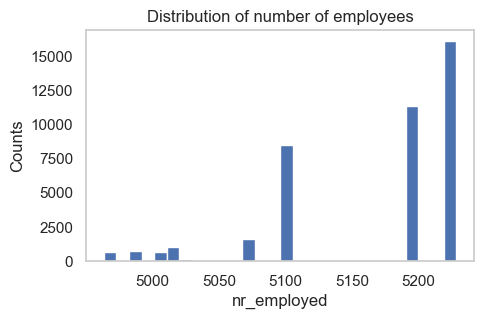

In [167]:
df['nr_employed'].plot(kind='hist',bins = 28, figsize=(5, 3))
plt.xlabel('nr_employed')
plt.ylabel('Counts')
plt.title('Distribution of number of employees')
plt.gca().ticklabel_format(axis='both', style='plain', useOffset=False)
plt.grid()

Text(0.5, 1.0, 'Distribution of number of employees')

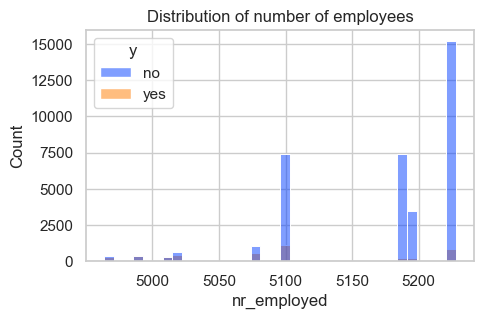

In [168]:
fig, ax = plt.subplots(figsize=(5,3))
sns.set_style('whitegrid')
sns.histplot(x='nr_employed',hue= 'y', data=df, palette = 'bright')
plt.title('Distribution of number of employees')

Text(0.5, 1.0, 'Boxplot of number of employees')

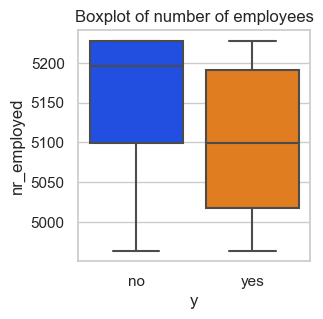

In [169]:
fig, ax = plt.subplots(figsize=(3,3))
sns.boxplot(x='y', y = 'nr_employed', data=df, palette = 'bright')
ax.set_title('Boxplot of number of employees')

<AxesSubplot: title={'center': 'Subscription% vs nr_employed'}, xlabel='nr_employed', ylabel='Subscription%'>

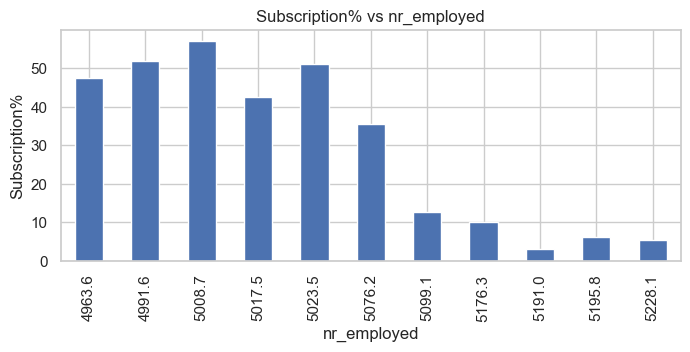

In [170]:
filter1=(df['y']=='yes')
nr_employed1=df.loc[filter1, ['nr_employed','y']].nr_employed.value_counts()

filter0=(df['y']=='no')
nr_employed0=df.loc[filter0, ['nr_employed','y']].nr_employed.value_counts()

yes_perc=nr_employed1/(nr_employed0+nr_employed1)*100
yes_perc.plot(kind='bar', xlabel='nr_employed', ylabel='Subscription%', title='Subscription% vs nr_employed',figsize=(8,3), rot=90)

In [171]:
yes_perc

4963.6    47.468354
4991.6    51.900393
5008.7    57.054264
5017.5    42.504744
5023.5    51.176471
5076.2    35.670732
5099.1    12.808751
5176.3    10.000000
5191.0     3.106644
5195.8     6.231293
5228.1     5.330928
Name: nr_employed, dtype: float64

##### nr_employed summary
It seems that the bigger nr_employed the less people will make a term deposite subscription. 

suggestion: we'll do the collinearity analysis of these five continious social and economic. They’re supposed to be highly correlated.

(array([0.5, 1.5, 2.5, 3.5, 4.5]),
 [Text(0, 0.5, 'emp_var_rate'),
  Text(0, 1.5, 'cons_price_idx'),
  Text(0, 2.5, 'cons_conf_idx'),
  Text(0, 3.5, 'euribor3m'),
  Text(0, 4.5, 'nr_employed')])

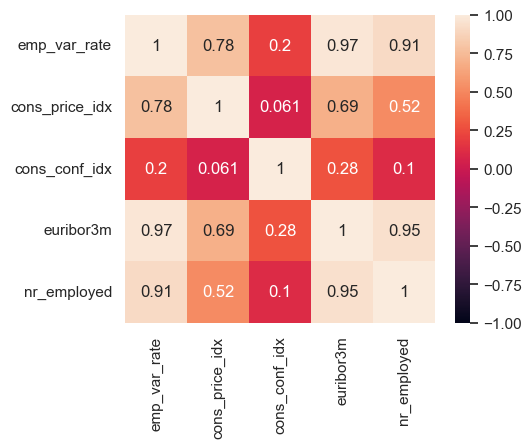

In [172]:
fig, ax = plt.subplots(figsize =(5,4))
sns.heatmap(df[['emp_var_rate','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']].corr(method='pearson'), vmin=-1, vmax=1, annot=True)
plt.yticks(rotation=0)

Three pairs show a correlation coefficient higher than 0.90: emp_var_rate and nr_employed, emp_var_rate and  euribor3m, nr_employed and euribor3m.  
Although the correlation coefficient between nr_employed and euribor3m is high, there is no direct relationship between them from an economic point of view. So, we will keep both variables.

suggestion: we'll remove emp_var_rate.

#### Distribution of social and economic context numeric data

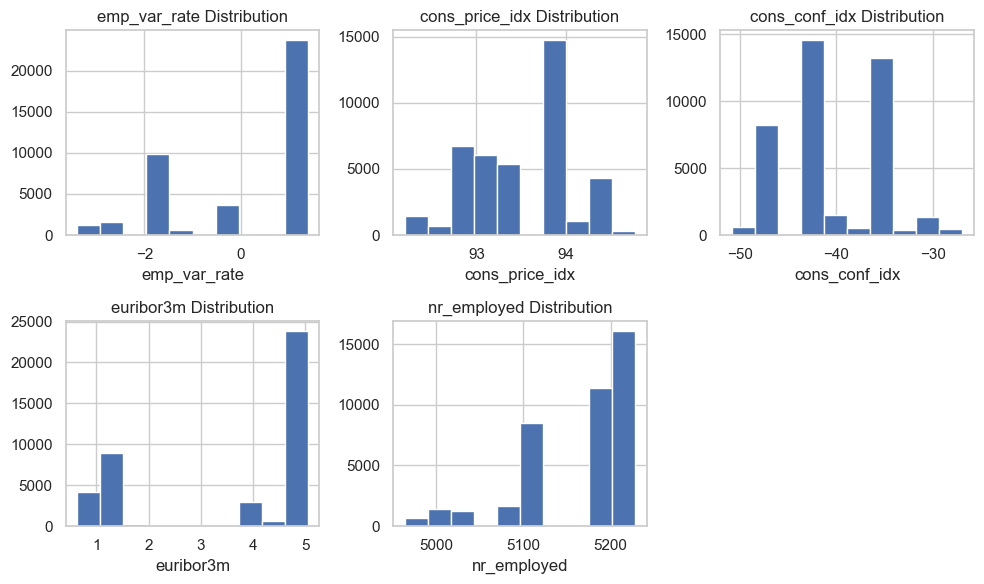

In [173]:
fig = plt.figure(figsize=(10, 6), dpi = 100)
plt.subplot(231)
plt.hist(df.emp_var_rate)
plt.xlabel('emp_var_rate')
plt.title('emp_var_rate Distribution')

plt.subplot(232)
plt.hist(df.cons_price_idx)
plt.xlabel('cons_price_idx')
plt.title('cons_price_idx Distribution')

plt.subplot(233)
plt.hist(df.cons_conf_idx)
plt.xlabel('cons_conf_idx')
plt.title('cons_conf_idx Distribution')

plt.subplot(234)
plt.hist(df.euribor3m)
plt.xlabel('euribor3m')
plt.title('euribor3m Distribution')

plt.subplot(235)
plt.hist(df.nr_employed)
plt.xlabel('nr_employed')
plt.title('nr_employed Distribution')

fig.tight_layout()
plt.show()

##### <font color='red'>Social and economic context attributes summary</font>
1. emp_var_rate: numerical; remove.
2. cons.price.idx: numerical; keep. 
3. cons.conf.idx: numerical; keep. 
4. euribor3m: numerical; keep.
5. nr.employed: numerical; keep.

### Outlier Removal

In [174]:
def detect_outliers(data, features):
    # Initialize a dictionary to count the number of times each index appears as an outlier
    outlier_counts = {}
    
    for c in features:
        # Calculate Q1, Q3, and IQR for column c
        Q1 = np.percentile(data[c],25)
        Q3 = np.percentile(data[c],75)
        IQR = Q3 - Q1
        
        # Calculate the outlier step
        outlier_step = IQR * 1.5
        
        # Identify rows that are outliers in column c
        outlier_rows = data[(data[c] < Q1 - outlier_step) | (data[c] > Q3 + outlier_step)].index
        
        # Update the outlier counts for each outlier row
        for i in outlier_rows:
            if i in outlier_counts:
                outlier_counts[i] += 1
            else:
                outlier_counts[i] = 1
    
    # Filter the outlier counts to only include indices that appear as outliers more than twice
    multiple_outliers = [i for i, count in outlier_counts.items() if count > 2]
    
    return multiple_outliers

In [175]:
indexes = df.loc[detect_outliers(df,['age','campaign','previous'])]

In [176]:
indexes.index.tolist()

[38834, 39174, 40068, 40456, 40517, 40599]

In [177]:
df = df.drop([38834, 39174, 40068, 40456, 40517, 40599], axis=0)

#### Outlier Summary

We identified the outliers of 'age','campaign','previous'and delected the rows.

## Summary for EDA
Bank Customers related attributes
1. age: numerical; we label this numerical data into 3 catagorical groups (‘age_bin’) and do OneHotEncoder/Dummy transform.
2. job: categorical; we drop “unknown” level and do Dummy transform. 
3. marital: categorical; we add “unknown” into 'single' level and do Dummy transform.
4. education: categorical; we add the “unknown” level to “university.degree” level, drop 'illiterate', and do OrdinalEncoder transformation.
5. default: categorical; remove.
6. housing: categorical; remove.
7. loan: categorical; remove.
Marketting Campaigns related attributes
1. duration: numerical; remove.
2. campaign: numerical; keep.
3. pdays: numerical; keep.
4. previous: numerical; keep.
5. contact: categorical; we use dummy transform it to numerical data.
6. month: categorical; we use dummy to transform this variable into numerical data.
7. day_of_week: categorical; we use dummy to transform this variable into numerical data.
8. poutcome: categorical; we use dummy to transform this variable into numerical data.
Social and economic context attributes summary
1. emp_var_rate: numerical; remove.
2. cons.price.idx: numerical; keep. 
3. cons.conf.idx: numerical; keep. 
4. euribor3m: numerical; keep.
5. nr.employed: numerical; keep.


In [179]:
df_final.dtypes

campaign             int64
previous             int64
cons_price_idx     float64
cons_conf_idx      float64
euribor3m          float64
nr_employed        float64
age_bin           category
job                 object
pdays_bin         category
marital             object
education           object
contact             object
month               object
day_of_week         object
poutcome            object
y                    int32
dtype: object

In [180]:
df_final.education.value_counts()

university.degree      12118
high.school             9475
basic.9y                6013
professional.course     5227
basic.4y                4122
basic.6y                2269
unknown                 1598
Name: education, dtype: int64

### Train test split 

In [181]:
features = list(df_final.columns)
target = 'y'
features.remove(target)

In [182]:
X = df_final[features]
y = df_final[target]

In [183]:
X_train_raw, X_test_raw, y_train_raw, y_test_raw = train_test_split(X, 
                                                                    y, 
                                                                    stratify=y,
                                                                    shuffle=True,
                                                                    random_state = 2023) 

In [184]:
X_train_raw

campaign  previous  cons_price_idx  cons_conf_idx  euribor3m  \
4992          4         0          93.994          -36.4      4.858   
17232         3         0          93.918          -42.7      4.962   
39047         2         3          92.713          -33.0      0.712   
26719         1         0          93.200          -42.0      4.076   
21375         4         0          93.444          -36.1      4.963   
...         ...       ...             ...            ...        ...   
37552         2         1          92.201          -31.4      0.869   
32736         6         0          92.893          -46.2      1.299   
25880         1         1          93.200          -42.0      4.120   
27690         1         0          92.843          -50.0      1.811   
24610         2         1          93.200          -42.0      4.191   

       nr_employed age_bin            job pdays_bin   marital  \
4992        5191.0   22-60  self-employed        -1  divorced   
17232       5228.1   22-60   entrepreneur        -1   married   
39047       5023.5    0-21        student        -1    single   
26719       5195.8   22-60       services        -1   married   
21375       5228.1   22-60         admin.        -1   married   
...            ...     ...            ...       ...       ...   
37552       5076.2    0-21        student        -1    single   
32736       5099.1   22-60    blue-collar        -1   married   
25880       5195.8   22-60     management        -1   married   
27690       5099.1   22-60     management        -1   married   
24610       5195.8   22-60       services        -1   married   

                 education    contact month day_of_week     poutcome  
4992               unknown  telephone   may         wed  nonexistent  
17232             basic.6y   cellular   jul         fri  nonexistent  
39047          high.school   cellular   dec         thu      failure  
26719          high.school  telephone   nov         thu  nonexistent  
21375    university.degree   cellular   aug         tue  nonexistent  
...                    ...        ...   ...         ...          ...  
37552          high.school   cellular   aug         fri      failure  
32736             basic.9y   cellular   may         mon  nonexistent  
25880    university.degree   cellular   nov         wed      failure  
27690    university.degree   cellular   mar         mon  nonexistent  
24610  professional.course   cellular   nov         mon      failure  

[30616 rows x 15 columns]

In [185]:
y_train_raw.value_counts(normalize=True)

0    0.887379
1    0.112621
Name: y, dtype: float64

In [186]:
y_test_raw.value_counts(normalize=True)

0    0.887321
1    0.112679
Name: y, dtype: float64

### Using Ordinal transformer for education and marital  and assign values based on Subscription Rate and years of education

In [187]:
class ordinal_Transformer(TransformerMixin):

    def fit(self, X, y=None):
        df = pd.DataFrame()
        df['education'] = X['education'].replace("unknown", "university.degree", inplace=True)
        df['marital'] = X['marital'].replace("unknown", "single", inplace=True)
        self.ord1 = {"basic.4y":0,"basic.6y":0,"basic.9y":0, "high.school":1,
                    "professional.course":2,"university.degree":3}
        self.ord2 = {"married":0,"single":2,"divorced":1}

    def transform(self, X, y=None):
        df = pd.DataFrame()
        df['education'] = X['education'].replace("unknown", "university.degree", inplace=True)
        df['marital'] = X['marital'].replace("unknown", "single", inplace=True)
        df['education'] = X['education'].map(self.ord1)
        df['marital'] = X['marital'].map(self.ord2)
        return df

    def fit_transform(self, X, y=None):     
        self.fit(X)
        return self.transform(X)

### Using OneHotEncoder/Dummy to transform the remaining categorical variables

In [195]:
class Dummy_Transformer(TransformerMixin):
    
    def fit(self, X, y=None):
        self.columns_ = X.columns
        return self
    
    def transform(self, X, y=None):
        if not hasattr(self, "columns_"):
            raise ValueError("Transformer has not been fit yet")
        return pd.get_dummies(data=X, columns=self.columns_)
    
    def fit_transform(self, X, y=None):
        self.fit(X)
        return self.transform(X)

### Building preprocessor pipeline

In [196]:
num_transformer = Pipeline(steps=[('scaler', MinMaxScaler())])

dum_transformer = Pipeline(steps=[('dummry', Dummy_Transformer())])

ord_transformer = Pipeline(steps=[('ord',ordinal_Transformer())])

preprocessor = ColumnTransformer(
               [('num', num_transformer,num_features),
                ('ord', ord_transformer,['education', 'marital']),
                ('dummy', dum_transformer,cat_features_1),
               ])

In [197]:
pd.DataFrame(preprocessor.fit_transform(X_train_raw))

0         1         2         3         4         5    6    7   \
0      0.071429  0.000000  0.698753  0.602510  0.957606  0.859735  3.0  1.0   
1      0.047619  0.000000  0.669135  0.338912  0.981183  1.000000  0.0  0.0   
2      0.023810  0.500000  0.199532  0.744770  0.017683  0.226465  1.0  2.0   
3      0.000000  0.000000  0.389322  0.368201  0.780322  0.877883  1.0  0.0   
4      0.071429  0.000000  0.484412  0.615063  0.981410  1.000000  3.0  0.0   
...         ...       ...       ...       ...       ...       ...  ...  ...   
30611  0.023810  0.166667  0.000000  0.811715  0.053276  0.425709  1.0  2.0   
30612  0.119048  0.000000  0.269680  0.192469  0.150759  0.512287  0.0  0.0   
30613  0.000000  0.166667  0.389322  0.368201  0.790297  0.877883  3.0  0.0   
30614  0.000000  0.000000  0.250195  0.033473  0.266833  0.512287  3.0  0.0   
30615  0.023810  0.166667  0.389322  0.368201  0.806393  0.877883  2.0  0.0   

        8    9   ...   37   38   39   40   41   42   43   44   45   46  
0      0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  1.0  0.0  
1      0.0  1.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  0.0  1.0  0.0  
2      1.0  0.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  0.0  
3      0.0  1.0  ...  0.0  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  
4      0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  1.0  0.0  
...    ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...  
30611  1.0  0.0  ...  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  0.0  
30612  0.0  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
30613  0.0  1.0  ...  0.0  0.0  0.0  0.0  0.0  0.0  1.0  1.0  0.0  0.0  
30614  0.0  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  0.0  1.0  0.0  
30615  0.0  1.0  ...  0.0  0.0  0.0  1.0  0.0  0.0  0.0  1.0  0.0  0.0  

[30616 rows x 47 columns]

### Feature Selection

#### Scaling the data

In [194]:
X_train_s = X_train_raw[["campaign", "previous", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed","education","marital","age_bin", "job", 
           "pdays_bin","contact", "month", "day_of_week", "poutcome"]]

scaler = MinMaxScaler()
X_train_s[["campaign", "previous", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed"]] = scaler.fit_transform(
X_train_raw[["campaign", "previous", "cons_price_idx", "cons_conf_idx","euribor3m", "nr_employed"]])

In [195]:
X_train_s.head()

campaign  previous  cons_price_idx  cons_conf_idx  euribor3m  \
4992   0.071429       0.0        0.698753       0.602510   0.957606   
17232  0.047619       0.0        0.669135       0.338912   0.981183   
39047  0.023810       0.5        0.199532       0.744770   0.017683   
26719  0.000000       0.0        0.389322       0.368201   0.780322   
21375  0.071429       0.0        0.484412       0.615063   0.981410   

       nr_employed          education   marital age_bin            job  \
4992      0.859735            unknown  divorced   22-60  self-employed   
17232     1.000000           basic.6y   married   22-60   entrepreneur   
39047     0.226465        high.school    single    0-21        student   
26719     0.877883        high.school   married   22-60       services   
21375     1.000000  university.degree   married   22-60         admin.   

      pdays_bin    contact month day_of_week     poutcome  
4992         -1  telephone   may         wed  nonexistent  
17232        -1   cellular   jul         fri  nonexistent  
39047        -1   cellular   dec         thu      failure  
26719        -1  telephone   nov         thu  nonexistent  
21375        -1   cellular   aug         tue  nonexistent

#### Encoding

In [196]:
ord = ordinal_Transformer() 
df1 = ord.fit_transform(X_train_s)

In [197]:
df1

education  marital
4992           3        1
17232          0        0
39047          1        2
26719          1        0
21375          3        0
...          ...      ...
37552          1        2
32736          0        0
25880          3        0
27690          3        0
24610          2        0

[30616 rows x 2 columns]

In [198]:
X_train_s['education'] = df1[['education']]
X_train_s['marital'] = df1[['marital']]

In [199]:
X_train_s.head()

campaign  previous  cons_price_idx  cons_conf_idx  euribor3m  \
4992   0.071429       0.0        0.698753       0.602510   0.957606   
17232  0.047619       0.0        0.669135       0.338912   0.981183   
39047  0.023810       0.5        0.199532       0.744770   0.017683   
26719  0.000000       0.0        0.389322       0.368201   0.780322   
21375  0.071429       0.0        0.484412       0.615063   0.981410   

       nr_employed  education  marital age_bin            job pdays_bin  \
4992      0.859735          3        1   22-60  self-employed        -1   
17232     1.000000          0        0   22-60   entrepreneur        -1   
39047     0.226465          1        2    0-21        student        -1   
26719     0.877883          1        0   22-60       services        -1   
21375     1.000000          3        0   22-60         admin.        -1   

         contact month day_of_week     poutcome  
4992   telephone   may         wed  nonexistent  
17232   cellular   jul         fri  nonexistent  
39047   cellular   dec         thu      failure  
26719  telephone   nov         thu  nonexistent  
21375   cellular   aug         tue  nonexistent

In [200]:
X_train_s = pd.get_dummies(X_train_s, columns = ["age_bin", "job",  "pdays_bin","contact", "month", "day_of_week", "poutcome"])
X_train_s.head()

campaign  previous  cons_price_idx  cons_conf_idx  euribor3m  \
4992   0.071429       0.0        0.698753       0.602510   0.957606   
17232  0.047619       0.0        0.669135       0.338912   0.981183   
39047  0.023810       0.5        0.199532       0.744770   0.017683   
26719  0.000000       0.0        0.389322       0.368201   0.780322   
21375  0.071429       0.0        0.484412       0.615063   0.981410   

       nr_employed  education  marital  age_bin_0-21  age_bin_22-60  ...  \
4992      0.859735          3        1             0              1  ...   
17232     1.000000          0        0             0              1  ...   
39047     0.226465          1        2             1              0  ...   
26719     0.877883          1        0             0              1  ...   
21375     1.000000          3        0             0              1  ...   

       month_oct  month_sep  day_of_week_fri  day_of_week_mon  \
4992           0          0                0                0   
17232          0          0                1                0   
39047          0          0                0                0   
26719          0          0                0                0   
21375          0          0                0                0   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
4992                 0                0                1                 0   
17232                0                0                0                 0   
39047                1                0                0                 1   
26719                1                0                0                 0   
21375                0                1                0                 0   

       poutcome_nonexistent  poutcome_success  
4992                      1                 0  
17232                     1                 0  
39047                     0                 0  
26719                     1                 0  
21375                     1                 0  

[5 rows x 47 columns]

In [201]:
X_train_s

campaign  previous  cons_price_idx  cons_conf_idx  euribor3m  \
4992   0.071429  0.000000        0.698753       0.602510   0.957606   
17232  0.047619  0.000000        0.669135       0.338912   0.981183   
39047  0.023810  0.500000        0.199532       0.744770   0.017683   
26719  0.000000  0.000000        0.389322       0.368201   0.780322   
21375  0.071429  0.000000        0.484412       0.615063   0.981410   
...         ...       ...             ...            ...        ...   
37552  0.023810  0.166667        0.000000       0.811715   0.053276   
32736  0.119048  0.000000        0.269680       0.192469   0.150759   
25880  0.000000  0.166667        0.389322       0.368201   0.790297   
27690  0.000000  0.000000        0.250195       0.033473   0.266833   
24610  0.023810  0.166667        0.389322       0.368201   0.806393   

       nr_employed  education  marital  age_bin_0-21  age_bin_22-60  ...  \
4992      0.859735          3        1             0              1  ...   
17232     1.000000          0        0             0              1  ...   
39047     0.226465          1        2             1              0  ...   
26719     0.877883          1        0             0              1  ...   
21375     1.000000          3        0             0              1  ...   
...            ...        ...      ...           ...            ...  ...   
37552     0.425709          1        2             1              0  ...   
32736     0.512287          0        0             0              1  ...   
25880     0.877883          3        0             0              1  ...   
27690     0.512287          3        0             0              1  ...   
24610     0.877883          2        0             0              1  ...   

       month_oct  month_sep  day_of_week_fri  day_of_week_mon  \
4992           0          0                0                0   
17232          0          0                1                0   
39047          0          0                0                0   
26719          0          0                0                0   
21375          0          0                0                0   
...          ...        ...              ...              ...   
37552          0          0                1                0   
32736          0          0                0                1   
25880          0          0                0                0   
27690          0          0                0                1   
24610          0          0                0                1   

       day_of_week_thu  day_of_week_tue  day_of_week_wed  poutcome_failure  \
4992                 0                0                1                 0   
17232                0                0                0                 0   
39047                1                0                0                 1   
26719                1                0                0                 0   
21375                0                1                0                 0   
...                ...              ...              ...               ...   
37552                0                0                0                 1   
32736                0                0                0                 0   
25880                0                0                1                 1   
27690                0                0                0                 0   
24610                0                0                0                 1   

       poutcome_nonexistent  poutcome_success  
4992                      1                 0  
17232                     1                 0  
39047                     0                 0  
26719                     1                 0  
21375                     1                 0  
...                     ...               ...  
37552                     0                 0  
32736                     1                 0  
25880                     0                 0  
27690                     1                

#### Selecting best features

In [202]:
X_s = X_train_s
y_s = y_train_raw

In [203]:
from sklearn.feature_selection import SelectKBest,chi2 
# We calculate Chi-square between each feature & the target & select the desired number of features 
# with best Chi-square scores or the lowest p-values. 
# The Chi-squared (χ2) test is used in statistics to test the independence of two events.

select_feature = SelectKBest(chi2).fit(X_s,y_s)
df_scores = pd.DataFrame(select_feature.scores_,columns=['Score'])
df_columns = pd.DataFrame(X_s.columns,columns=['Feature'])

In [204]:
features_rank = pd.concat([df_columns,df_scores],axis=1)
features_rank.sort_values('Score',ascending=False)

Feature        Score
46      poutcome_success  2922.299490
22         pdays_bin_0-6  2354.875379
10        age_bin_61-100   858.556618
34             month_mar   658.524149
4              euribor3m   647.427446
37             month_oct   602.172263
23        pdays_bin_7-13   578.264819
38             month_sep   509.741977
28     contact_telephone   406.784928
1               previous   384.574753
5            nr_employed   366.810226
16           job_retired   284.198081
19           job_student   270.599477
27      contact_cellular   231.626357
35             month_may   226.443400
31             month_dec   187.605204
45  poutcome_nonexistent   154.082983
29             month_apr   150.614860
12       job_blue-collar   139.315640
6              education   120.995223
26          pdays_bin_-1   117.953626
24       pdays_bin_14-20   117.803498
7                marital   100.729724
8           age_bin_0-21    93.117942
2         cons_price_idx    53.569503
18          job_services    31.160056
44      poutcome_failure    27.477482
9          age_bin_22-60    27.115082
32             month_jul    26.511043
11            job_admin.    22.760255
0               campaign    17.681558
25       pdays_bin_21-27    16.260267
21        job_unemployed    15.465444
40       day_of_week_mon    12.967954
13      job_entrepreneur    10.578051
3          cons_conf_idx     9.520907
33             month_jun     5.375698
41       day_of_week_thu     4.985910
36             month_nov     4.985130
30             month_aug     2.144827
20        job_technician     1.714870
42       day_of_week_tue     1.314932
17     job_self-employed     1.016722
43       day_of_week_wed     0.961506
39       day_of_week_fri     0.578636
14         job_housemaid     0.284323
15        job_management     0.259250

In [205]:
len(features_rank)

47

Selecting top 40 Features

In [206]:
features_rank = features_rank.nlargest(40,'Score')
features_rank

Feature        Score
46      poutcome_success  2922.299490
22         pdays_bin_0-6  2354.875379
10        age_bin_61-100   858.556618
34             month_mar   658.524149
4              euribor3m   647.427446
37             month_oct   602.172263
23        pdays_bin_7-13   578.264819
38             month_sep   509.741977
28     contact_telephone   406.784928
1               previous   384.574753
5            nr_employed   366.810226
16           job_retired   284.198081
19           job_student   270.599477
27      contact_cellular   231.626357
35             month_may   226.443400
31             month_dec   187.605204
45  poutcome_nonexistent   154.082983
29             month_apr   150.614860
12       job_blue-collar   139.315640
6              education   120.995223
26          pdays_bin_-1   117.953626
24       pdays_bin_14-20   117.803498
7                marital   100.729724
8           age_bin_0-21    93.117942
2         cons_price_idx    53.569503
18          job_services    31.160056
44      poutcome_failure    27.477482
9          age_bin_22-60    27.115082
32             month_jul    26.511043
11            job_admin.    22.760255
0               campaign    17.681558
25       pdays_bin_21-27    16.260267
21        job_unemployed    15.465444
40       day_of_week_mon    12.967954
13      job_entrepreneur    10.578051
3          cons_conf_idx     9.520907
33             month_jun     5.375698
41       day_of_week_thu     4.985910
36             month_nov     4.985130
30             month_aug     2.144827

In [207]:
features_rank.Feature.values

array(['poutcome_success', 'pdays_bin_0-6', 'age_bin_61-100', 'month_mar',
       'euribor3m', 'month_oct', 'pdays_bin_7-13', 'month_sep',
       'contact_telephone', 'previous', 'nr_employed', 'job_retired',
       'job_student', 'contact_cellular', 'month_may', 'month_dec',
       'poutcome_nonexistent', 'month_apr', 'job_blue-collar',
       'education', 'pdays_bin_-1', 'pdays_bin_14-20', 'marital',
       'age_bin_0-21', 'cons_price_idx', 'job_services',
       'poutcome_failure', 'age_bin_22-60', 'month_jul', 'job_admin.',
       'campaign', 'pdays_bin_21-27', 'job_unemployed', 'day_of_week_mon',
       'job_entrepreneur', 'cons_conf_idx', 'month_jun',
       'day_of_week_thu', 'month_nov', 'month_aug'], dtype=object)

In [208]:
X_f = X_s[['poutcome_success', 'pdays_bin_0-6', 'age_bin_61-100', 'month_mar',
       'euribor3m', 'pdays_bin_7-13', 'month_oct', 'month_sep',
       'contact_telephone', 'previous', 'nr_employed', 'job_retired',
       'job_student', 'contact_cellular', 'month_may', 'month_dec',
       'poutcome_nonexistent', 'month_apr', 'job_blue-collar',
       'education', 'pdays_bin_-1', 'pdays_bin_14-20', 'marital',
       'age_bin_0-21', 'cons_price_idx', 'job_services', 'age_bin_22-60',
       'month_jul', 'poutcome_failure', 'pdays_bin_21-27', 'job_admin.',
       'campaign', 'job_unemployed', 'day_of_week_mon',
       'job_entrepreneur', 'cons_conf_idx', 'month_jun', 'month_nov',
       'day_of_week_thu', 'month_aug']]

In [209]:
y_f = y_s

In [210]:
df_f = X_s[['poutcome_success', 'pdays_bin_0-6', 'age_bin_61-100', 'month_mar',
       'euribor3m', 'pdays_bin_7-13', 'month_oct', 'month_sep',
       'contact_telephone', 'previous', 'nr_employed', 'job_retired',
       'job_student', 'contact_cellular', 'month_may', 'month_dec',
       'poutcome_nonexistent', 'month_apr', 'job_blue-collar',
       'education', 'pdays_bin_-1', 'pdays_bin_14-20', 'marital',
       'age_bin_0-21', 'cons_price_idx', 'job_services', 'age_bin_22-60',
       'month_jul', 'poutcome_failure', 'pdays_bin_21-27', 'job_admin.',
       'campaign', 'job_unemployed', 'day_of_week_mon',
       'job_entrepreneur', 'cons_conf_idx', 'month_jun', 'month_nov',
       'day_of_week_thu', 'month_aug']]
df_f["y"] = y_f

In [211]:
df_f.head()

poutcome_success  pdays_bin_0-6  age_bin_61-100  month_mar  euribor3m  \
4992                  0              0               0          0   0.957606   
17232                 0              0               0          0   0.981183   
39047                 0              0               0          0   0.017683   
26719                 0              0               0          0   0.780322   
21375                 0              0               0          0   0.981410   

       pdays_bin_7-13  month_oct  month_sep  contact_telephone  previous  ...  \
4992                0          0          0                  1       0.0  ...   
17232               0          0          0                  0       0.0  ...   
39047               0          0          0                  0       0.5  ...   
26719               0          0          0                  1       0.0  ...   
21375               0          0          0                  0       0.0  ...   

       campaign  job_unemployed  day_of_week_mon  job_entrepreneur  \
4992   0.071429               0                0                 0   
17232  0.047619               0                0                 1   
39047  0.023810               0                0                 0   
26719  0.000000               0                0                 0   
21375  0.071429               0                0                 0   

       cons_conf_idx  month_jun  month_nov  day_of_week_thu  month_aug  y  
4992        0.602510          0          0                0          0  0  
17232       0.338912          0          0                0          0  0  
39047       0.744770          0          0                1          0  0  
26719       0.368201          0          1                1          0  0  
21375       0.615063          0          0                0          1  0  

[5 rows x 41 columns]

In [212]:
X_f.head()

poutcome_success  pdays_bin_0-6  age_bin_61-100  month_mar  euribor3m  \
4992                  0              0               0          0   0.957606   
17232                 0              0               0          0   0.981183   
39047                 0              0               0          0   0.017683   
26719                 0              0               0          0   0.780322   
21375                 0              0               0          0   0.981410   

       pdays_bin_7-13  month_oct  month_sep  contact_telephone  previous  ...  \
4992                0          0          0                  1       0.0  ...   
17232               0          0          0                  0       0.0  ...   
39047               0          0          0                  0       0.5  ...   
26719               0          0          0                  1       0.0  ...   
21375               0          0          0                  0       0.0  ...   

       job_admin.  campaign  job_unemployed  day_of_week_mon  \
4992            0  0.071429               0                0   
17232           0  0.047619               0                0   
39047           0  0.023810               0                0   
26719           0  0.000000               0                0   
21375           1  0.071429               0                0   

       job_entrepreneur  cons_conf_idx  month_jun  month_nov  day_of_week_thu  \
4992                  0       0.602510          0          0                0   
17232                 1       0.338912          0          0                0   
39047                 0       0.744770          0          0                1   
26719                 0       0.368201          0          1                1   
21375                 0       0.615063          0          0                0   

       month_aug  
4992           0  
17232          0  
39047          0  
26719          0  
21375          1  

[5 rows x 40 columns]

### Pearson Correlation of features

#### Pearson Correlation of numerical features

In [213]:
train_numeric = X_train_raw[['campaign', 'previous','cons_price_idx','cons_conf_idx','euribor3m','nr_employed']]
train_numeric.head()
train_numeric.corr(method='pearson')

campaign  previous  cons_price_idx  cons_conf_idx  euribor3m  \
campaign        1.000000 -0.080317        0.129255      -0.015173   0.136181   
previous       -0.080317  1.000000       -0.202324      -0.047970  -0.455824   
cons_price_idx  0.129255 -0.202324        1.000000       0.060742   0.689614   
cons_conf_idx  -0.015173 -0.047970        0.060742       1.000000   0.276474   
euribor3m       0.136181 -0.455824        0.689614       0.276474   1.000000   
nr_employed     0.145644 -0.504349        0.523855       0.098979   0.945274   

                nr_employed  
campaign           0.145644  
previous          -0.504349  
cons_price_idx     0.523855  
cons_conf_idx      0.098979  
euribor3m          0.945274  
nr_employed        1.000000

<AxesSubplot: >

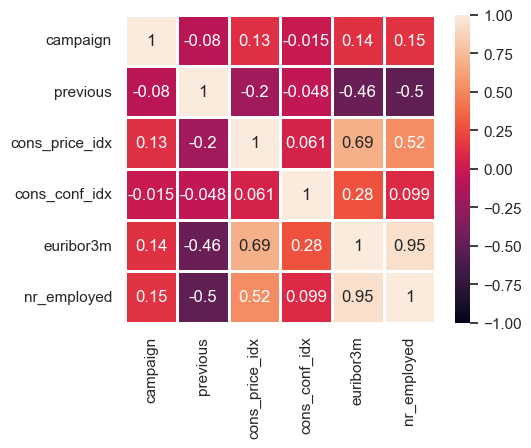

In [214]:
#heatmap
fig, ax = plt.subplots(figsize=(5,4))
sns.heatmap(train_numeric.corr(method='pearson'), vmin=-1, vmax=1, lw=2, annot=True) 

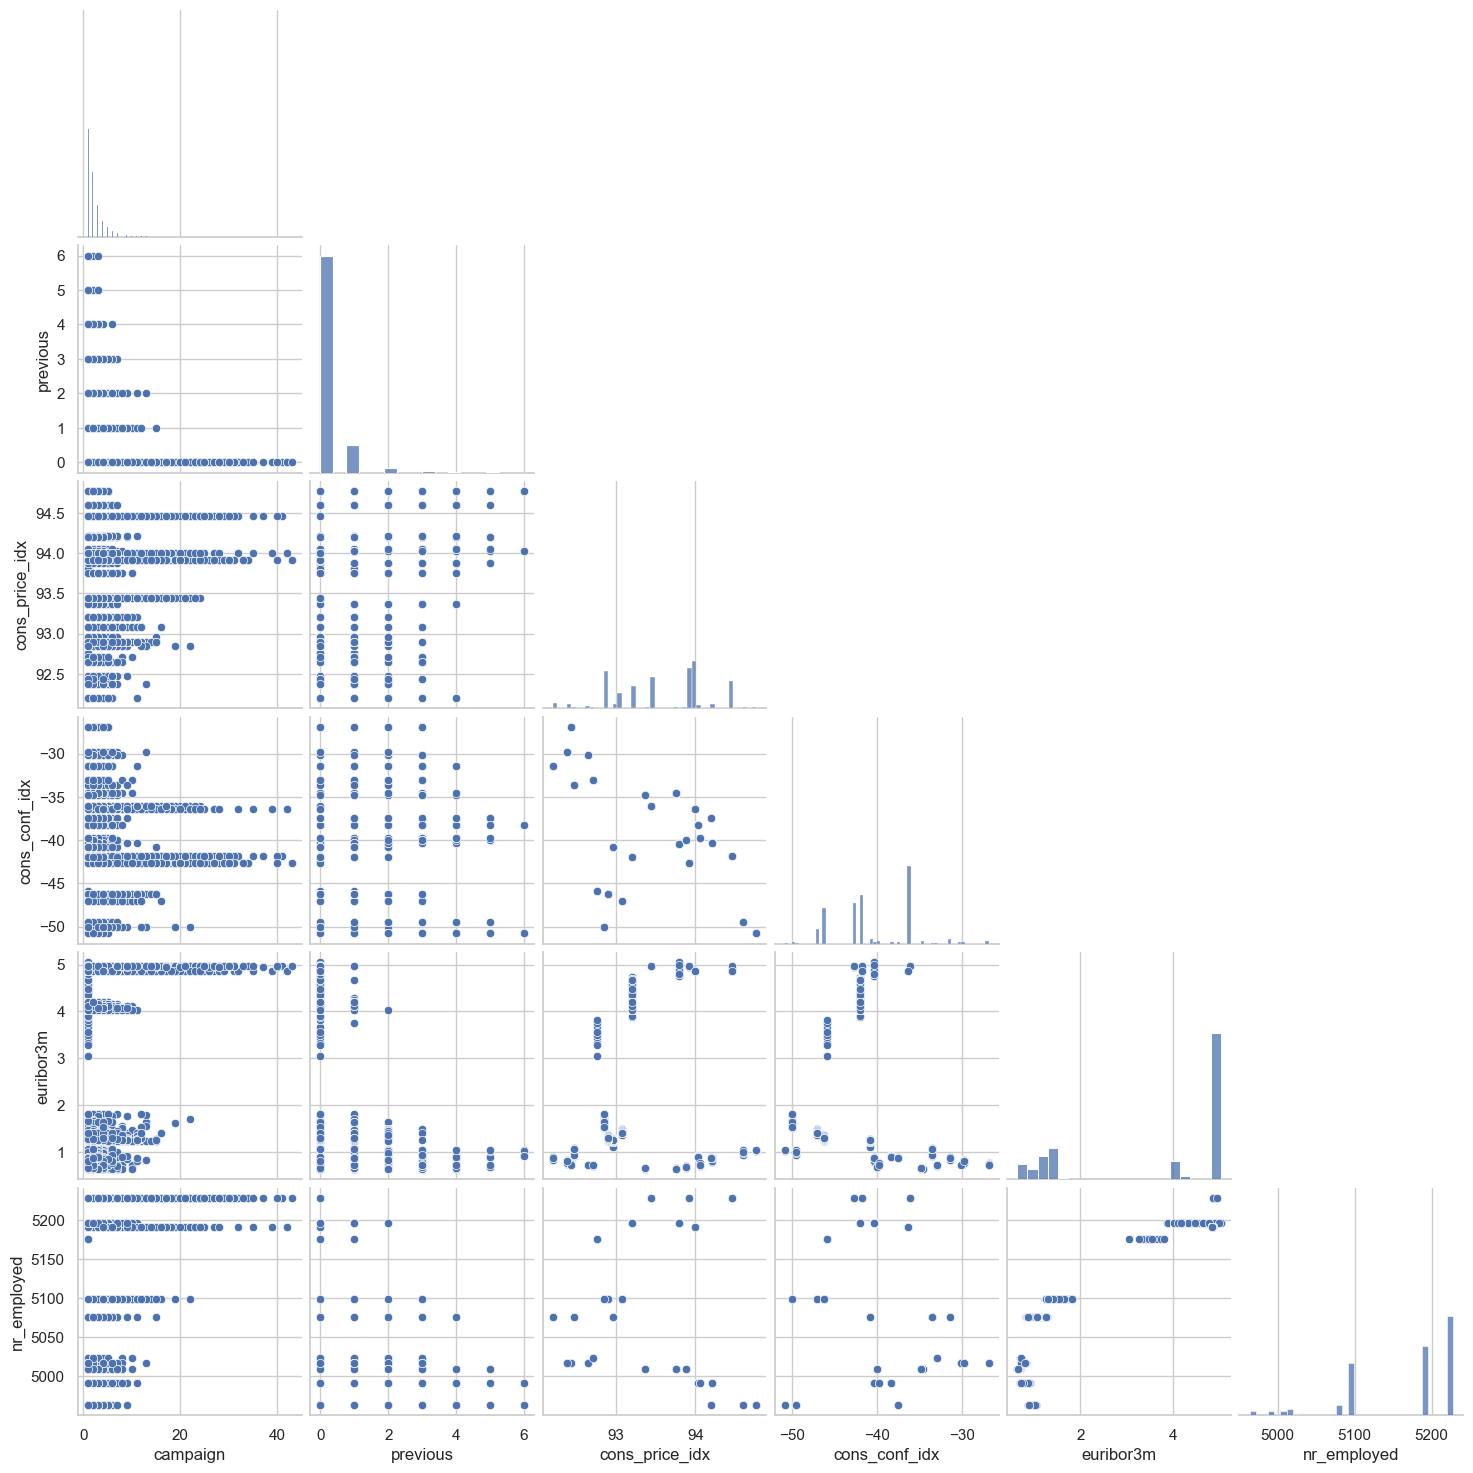

In [215]:
#pairplot
sns.pairplot(train_numeric, corner=True)

In [216]:
train_numeric.describe()

campaign      previous  cons_price_idx  cons_conf_idx  \
count  30616.000000  30616.000000    30616.000000   30616.000000   
mean       2.570486      0.174255       93.573243     -40.518111   
std        2.797983      0.495722        0.579540       4.631738   
min        1.000000      0.000000       92.201000     -50.800000   
25%        1.000000      0.000000       93.075000     -42.700000   
50%        2.000000      0.000000       93.749000     -41.800000   
75%        3.000000      0.000000       93.994000     -36.400000   
max       43.000000      6.000000       94.767000     -26.900000   

          euribor3m   nr_employed  
count  30616.000000  30616.000000  
mean       3.614261   5166.858616  
std        1.736409     72.291154  
min        0.634000   4963.600000  
25%        1.344000   5099.100000  
50%        4.857000   5191.000000  
75%        4.961000   5228.100000  
max        5.045000   5228.100000

#### Pearson Correlation of all transformed features

In [217]:
df_f.corr(method='pearson')

poutcome_success  pdays_bin_0-6  age_bin_61-100  \
poutcome_success              1.000000       0.853437        0.135274   
pdays_bin_0-6                 0.853437       1.000000        0.133308   
age_bin_61-100                0.135274       0.133308        1.000000   
month_mar                     0.073068       0.051626        0.095137   
euribor3m                    -0.280104      -0.247786       -0.233836   
pdays_bin_7-13                0.369553      -0.014833        0.040495   
month_oct                     0.124018       0.129126        0.156484   
month_sep                     0.155920       0.150531        0.107563   
contact_telephone            -0.112243      -0.101034       -0.081326   
previous                      0.528434       0.506641        0.150792   
nr_employed                  -0.352560      -0.313633       -0.275706   
job_retired                   0.068982       0.067204        0.545798   
job_student                   0.085394       0.073790       -0.022265   
contact_cellular              0.112243       0.101034        0.081326   
month_may                    -0.066142      -0.069376       -0.085253   
month_dec                     0.074075       0.073873        0.101217   
poutcome_nonexistent         -0.463156      -0.410120       -0.128438   
month_apr                     0.013838       0.010305        0.054832   
job_blue-collar              -0.062924      -0.059097       -0.075642   
education                     0.049769       0.045928       -0.033452   
pdays_bin_-1                 -0.948434      -0.839829       -0.140035   
pdays_bin_14-20               0.150098      -0.007198        0.033706   
marital                       0.031412       0.023335       -0.070080   
age_bin_0-21                  0.050911       0.047407       -0.011873   
cons_price_idx               -0.071553      -0.072261       -0.130860   
job_services                 -0.026921      -0.023592       -0.047789   
age_bin_22-60                -0.144089      -0.140697       -0.882741   
month_jul                    -0.046103      -0.046330       -0.042869   
poutcome_failure             -0.063188      -0.037210        0.065530   
pdays_bin_21-27               0.045817      -0.001872       -0.001727   
job_admin.                    0.023249       0.016578       -0.069613   
campaign                     -0.051032      -0.044156       -0.035858   
job_unemployed                0.024421       0.023824       -0.017014   
day_of_week_mon               0.000296      -0.002187        0.000466   
job_entrepreneur             -0.017078      -0.015363       -0.020156   
cons_conf_idx                 0.086922       0.096217        0.123032   
month_jun                    -0.021111      -0.016651       -0.038366   
month_nov                     0.009505       0.012920       -0.006156   
day_of_week_thu               0.008411       0.003711       -0.008211   
month_aug                     0.004089       0.010870        0.018897   
y                             0.314192       0.281034        0.169359   

                      month_mar  euribor3m  pdays_bin_7-13  month_oct  \
poutcome_success       0.073068  -0.280104        0.369553   0.124018   
pdays_bin_0-6          0.051626  -0.247786       -0.014833   0.129126   
age_bin_61-100         0.095137  -0.233836        0.040495   0.156484   
month_mar              1.000000  -0.165188        0.071154  -0.015544   
euribor3m             -0.165188   1.000000       -0.139059  -0.182888   
pdays_bin_7-13         0.071154  -0.139059        1.000000   0.038228   
month_oct             -0.015544  -0.182888        0.038228   1.000000   
month_sep             -0.014024  -0.191366        0.032333  -0.015863   
contact_telephone     -0.065544   0.400299       -0.052446  -0.041148   
previous               0.073326  -0.455824        0.260147   0.135423   
nr_employed           -0.179814   0.945274       -0.170106  -0.269661   
job_retired            0.045464  -0.105320        0.026093   0.092825   
job_st

<AxesSubplot: >

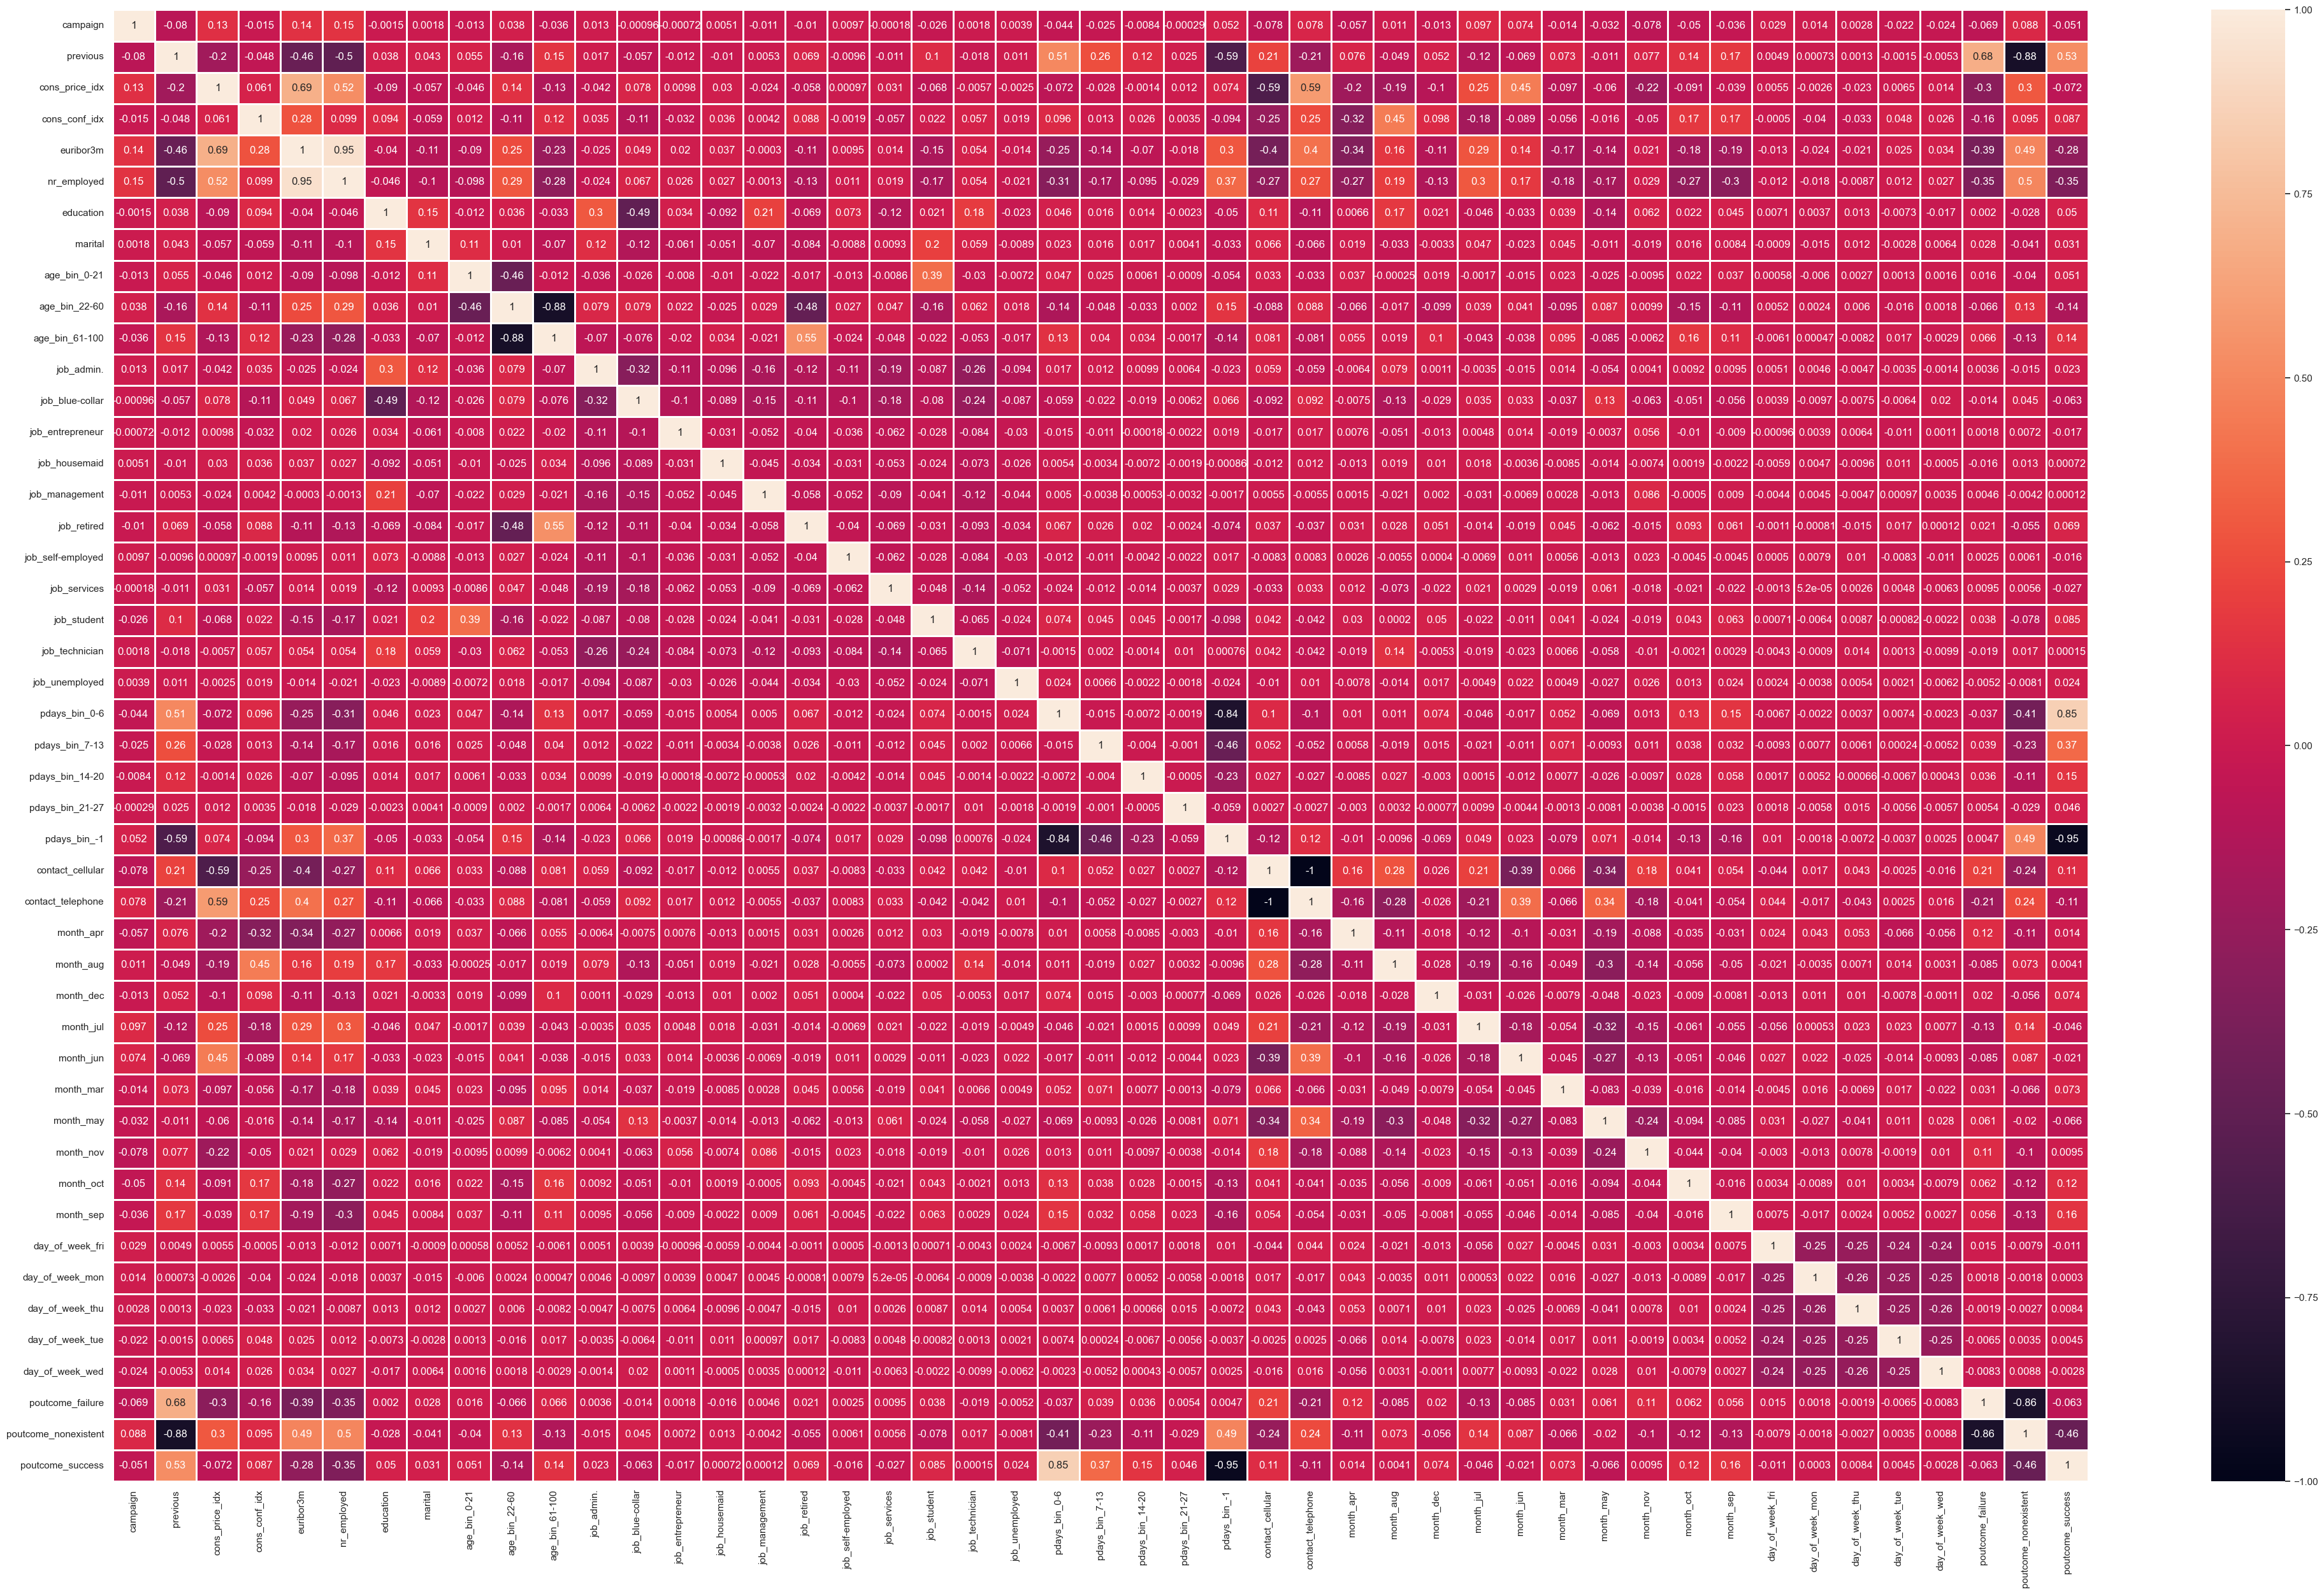

In [218]:
#heatmap
fig, ax = plt.subplots(figsize=(50,30))
sns.heatmap(X_s.corr(method='pearson'), vmin=-1, vmax=1, lw=2, annot=True)

#### Pearson Correlation summary
Numerical: As we analyed above there are low correlations between numerical features except 'euribor3m' and 'nr_employed'.   
All transformed features: Some of them have corlinearities. So, we'll do PCA analysis. 

suggestion: we'll keep all the numerical features and do PCA analysis with all the transformed features.

### PCA analysis

#### PCA analysis of numeric features 

<BarContainer object of 6 artists>

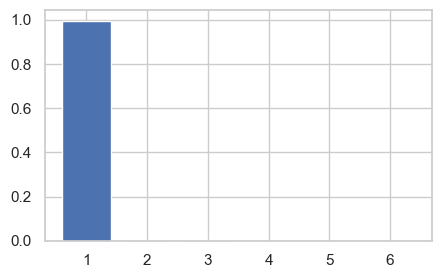

In [219]:
pca = PCA()
pca_out = pca.fit(train_numeric)
plt.figure(figsize=(5,3))
x = [i for i in range(1, pca.n_components_ + 1)]
y = pca.explained_variance_ratio_
plt.bar(x, y)

In [220]:
loadings = pca_out.components_
num_pc = pca_out.n_features_
pc_list = ["PC"+str(i) for i in list(range(1, num_pc+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = train_numeric.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5       PC6
variable                                                                  
campaign       -0.005643 -0.028020  0.999517 -0.010382  0.002332  0.005894
previous        0.003457  0.000311 -0.001196  0.102891  0.994675 -0.004576
cons_price_idx -0.004199  0.001625  0.011771  0.725243 -0.078139 -0.683929
cons_conf_idx  -0.006372  0.997151  0.027690 -0.049005  0.004584 -0.049603
euribor3m      -0.022701  0.069584  0.004737  0.678685 -0.066793  0.727699
nr_employed    -0.999691 -0.007783 -0.005980 -0.017732  0.005243 -0.013385

Feature contribution to principle components


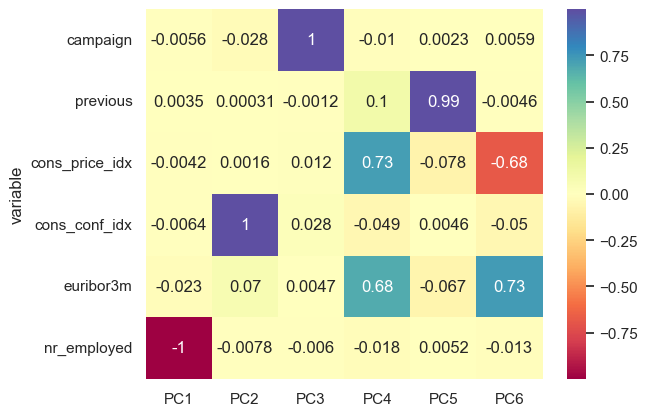

<Figure size 300x300 with 0 Axes>

In [221]:
print("Feature contribution to principle components")
ax = sns.heatmap(loadings_df, annot=True, cmap='Spectral')
plt.figure(figsize=(3, 3))
plt.show()

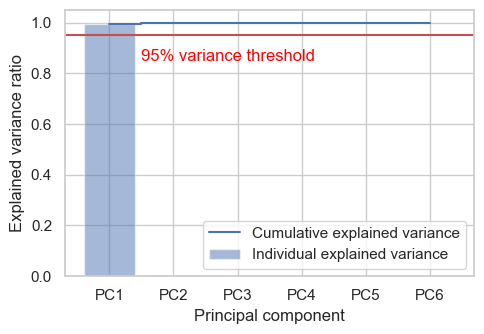

In [222]:
exp_var_pca = pca.explained_variance_ratio_
cum_sum_eigenvalues = np.cumsum(exp_var_pca)

plt.figure(figsize=(5, 3.5))
plt.bar(['PC1', 'PC2', 'PC3', 'PC4', 'PC5','PC6'], exp_var_pca, alpha=0.5, align='center', label='Individual explained variance')
plt.step(['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6'], cum_sum_eigenvalues, where='mid',label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0.5, 0.85, '95% variance threshold', color = 'red', fontsize=12)
plt.legend(loc='best')
plt.tight_layout()
plt.show()

#### PCA analysis of all transformed features 

<BarContainer object of 40 artists>

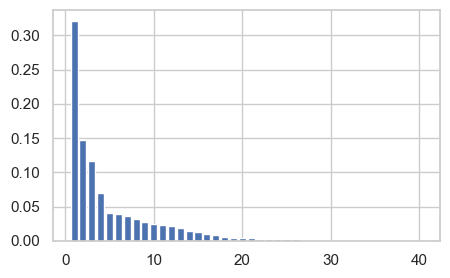

In [223]:
pca_out1 = pca.fit(X_f)
plt.figure(figsize=(5,3))
x = [i for i in range(1, pca.n_components_ + 1)]
y = pca.explained_variance_ratio_
plt.bar(x, y)

In [224]:
loadings = pca_out.components_
num_pc_f = pca_out.n_features_

pc_list = ["PC"+str(i) for i in list(range(1, num_pc_f+1))]
loadings_df = pd.DataFrame.from_dict(dict(zip(pc_list, loadings)))
loadings_df['variable'] = X_f.columns.values
loadings_df = loadings_df.set_index('variable')
loadings_df

PC1       PC2       PC3       PC4       PC5  \
variable                                                                     
poutcome_success      1.000836e-02  0.013238  0.047779  0.067627  0.034623   
pdays_bin_0-6         8.128857e-03  0.009618  0.039033  0.053746  0.029243   
age_bin_61-100       -3.158932e-03 -0.004750  0.035457  0.031607  0.020223   
month_mar             4.735220e-03  0.007232  0.013431  0.013566  0.010790   
euribor3m            -2.759234e-02 -0.105527 -0.280358 -0.431637 -0.038412   
pdays_bin_7-13        1.797397e-03  0.003697  0.011237  0.018527  0.007788   
month_oct             3.463571e-03  0.004859  0.016437  0.024301  0.009688   
month_sep             5.053477e-03  0.002634  0.015955  0.023370  0.007950   
contact_telephone    -7.167990e-02 -0.104760 -0.565509  0.160773  0.040905   
previous              4.536460e-03  0.011588  0.040673  0.064470  0.021447   
nr_employed          -1.870261e-02 -0.064933 -0.155607 -0.319372 -0.032489   
job_retired          -1.062972e-02 -0.011481  0.030025  0.016762  0.021799   
job_student           6.158769e-03  0.034726  0.005285  0.016957  0.003533   
contact_cellular      7.167990e-02  0.104760  0.565509 -0.160773 -0.040905   
month_may            -6.621237e-02  0.006468 -0.192460  0.533625 -0.206501   
month_dec             1.303604e-03  0.000254  0.005023  0.006587  0.002966   
poutcome_nonexistent -1.648395e-02 -0.053366 -0.190211 -0.303647 -0.088728   
month_apr             5.032707e-03  0.020150  0.077845  0.052986  0.028657   
job_blue-collar      -1.772264e-01  0.014349 -0.010018  0.003664 -0.074087   
education             9.440741e-01 -0.224158 -0.084804  0.054063 -0.032396   
pdays_bin_-1         -1.081854e-02 -0.014942 -0.053627 -0.076233 -0.039431   
pdays_bin_14-20       7.084266e-04  0.001204  0.002827  0.003373  0.002477   
marital               2.030485e-01  0.947471 -0.220654 -0.061044  0.006288   
age_bin_0-21          5.262417e-04  0.011284  0.003346  0.004285  0.001898   
cons_price_idx       -2.564588e-02 -0.041744 -0.192319 -0.129556  0.031334   
job_services         -2.692915e-02  0.015747 -0.010540  0.009563 -0.008387   
age_bin_22-60         2.632690e-03 -0.006534 -0.038803 -0.035892 -0.022121   
month_jul            -8.874378e-03  0.032185  0.051567 -0.364816 -0.036365   
poutcome_failure      6.475592e-03  0.040128  0.142432  0.236020  0.054106   
pdays_bin_21-27       4.585582e-07  0.000099  0.000152  0.000175 -0.000139   
job_admin.            1.197488e-01  0.020143 -0.008253 -0.017231  0.087630   
campaign             -4.014853e-04 -0.001616 -0.009149 -0.012755  0.001343   
job_unemployed       -2.446823e-03 -0.000613  0.000913  0.000091  0.002502   
day_of_week_mon       1.105569e-03 -0.007524  0.013226  0.002764  0.671213   
job_entrepreneur      3.199346e-03 -0.016442 -0.001658  0.001266 -0.002440   
cons_conf_idx         1.155448e-02 -0.033813 -0.057636 -0.022531 -0.003999   
month_jun            -1.599915e-02 -0.034255 -0.168326 -0.056391  0.174786   
month_nov             1.792100e-02 -0.004951  0.077528 -0.033969  0.017763   
day_of_week_thu       6.207152e-03  0.009289  0.027743 -0.029280 -0.660229   
month_aug             5.357632e-02 -0.034575  0.103000 -0.199259 -0.009735   

                           PC6       PC7       PC8       PC9      PC10  ...  \
variable                                                                ...   
poutcome_success      0.120621  0.005172  0.005770  0.009682  0.031815  ...   
pdays_bin_0-6         0.100777  0.003725  0.009317  0.008961  0.030404  ...   
age_bin_61-100        0.058416 -0.004658  0.036288  0.056830 -0.037153  ...   
month_mar             0.019211 -0.002599 -0.000228  0.002042 -0.025671  ...   
euribor3m            -0.113433  0.015906  0.022527  0.011628  0.330566  ...   
pdays_bin_7-13        0.025247  0.000238 -0.004525  0.000218  0.011537  ...   
month_oct             0.041802  0.003987  0.007145  0.011890 -0.016125  ...   
month_sep             0.036408  0.000485  0

#### PCA analysis summary
numerical: PC1 accounts for almost total variance.   
There is a lot debate on applying PCA to other data types (nominal, ordinal, binary) than continuous. So, we only use it on numerical features.    
All traformed features: the first 15 PCs account for over 95% variance.

Question: It's hard to explain the feature imporance.